# Case Study:  Reddit Social Network Analysis Against Influence Operation
Adel Abu Hashim & Mahmoud Nagy - August 2021

## Table of Contents
<ul>
<li><a href="#intro"><b><mark>Introduction<mark/><b/></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This case study aims to help **Amber Heard** <br>
> 
> By analyzing new accounts posting/ commenting against a victim of a Social Bot Disinformation/Influence Operation. 
> 
> **We have three main datasets**: <br>
>(The datasets screaped from **reddit**).
> - 1- A dataset with submissions & comments data (2021).
> - 2- Users Data (from 2006 to 2021).
> - 3- A merged dataset (submissions & comments data, users data).
> - 4- Daily creation data 
> (# of accounts created per day from 2006 to 2021)

In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import helpers
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import re
import warnings
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")
%matplotlib inline

import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 900
svg_renderer.height = 500

In [2]:
# load data
df = pd.read_csv("cleaned_data/reddit_cleaned_2021.csv")
df_merged = pd.read_csv("cleaned_data/reddit_merged_2021.csv")

In [3]:
# convert to datetime
df.created_at = pd.to_datetime(df.created_at)
df_merged.created_at = pd.to_datetime(df_merged.created_at)
df_merged.user_created_at = pd.to_datetime(df_merged.user_created_at)

In [4]:
print(df.shape)
df.head(2);

(18305, 17)


In [5]:
print(df_merged.shape)
df_merged.head(2);

(18305, 24)


In [6]:
# Filter on banned accounts
df_banned = df_merged[df_merged['is_banned']]
print(df_banned.shape)
df_banned.head(2);

(1323, 24)


**Note:** we only have user names for the banned accounts

In [7]:
# Filter on unverified accounts
df_unverified = df_merged[~df_merged['has_verified_email']]
print(df_unverified.shape)
df_unverified.head(2);

(2082, 24)


In [8]:
# Filter on Accounts created in the last 4 years
df_4 = df_merged[df_merged['user_created_at'].dt.year.isin([2018, 2019, 2020, 2021])]
print(df_4.shape)
df_4.head(2);

(9759, 24)


In [9]:
# Filter on Accounts created in 2018
df_18 = df_merged[df_merged['user_created_at'].dt.year == 2018]
print(df_18.shape)
df_18.head(2);

(1807, 24)


In [10]:
# Filter on Accounts created in 2019
df_19 = df_merged[df_merged['user_created_at'].dt.year == 2019]
print(df_19.shape)
df_19.head(2);

(2857, 24)


In [11]:
# Filter on Accounts created in 2020
df_20 = df_merged[df_merged['user_created_at'].dt.year == 2020]
print(df_20.shape)
df_20.head(2);

(3859, 24)


In [12]:
# Filter on Accounts created in 2020
df_21 = df_merged[df_merged['user_created_at'].dt.year == 2021]
print(df_21.shape)
df_21.head(2);

(1236, 24)


In [13]:
# Filter on Peak Day 
df_peak = df_merged[df_merged['created_at'].dt.date.astype('str') == '2021-04-17']
df_peak_submissions = df_peak.query("submission_comment == 'submission'")

In [14]:
# Filter on Peak Day For Unverified accounts
df_unverified_peak = df_unverified[df_unverified['created_at'].dt.date.astype('str') == '2021-04-17']
df_unverified_peak_submissions = df_unverified_peak.query("submission_comment == 'submission'")

In [15]:
# Filter on Submissions
df_submissions = df_merged.query("submission_comment == 'submission'")
df_unverified_submissions = df_unverified.query("submission_comment == 'submission'")

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b><mark>Exploratory Data Analysis</mark></b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='banned_unverified'></a>
># Banned / Unverified

<ul>
<li><a href="#banned_unverified"><b><mark>Banned / Unverified</mark></b></a></li>
<li><a href="#explore_banned">Banned Accounts</a></li>
    <br>
<li><a href="#explore_unverified">Unverified Accounts</a></li>
    <br>
<li><a href="#new_others">New Vs Others</a></li>
<li><a href="#explore_new">New Accounts</a></li>
    <br>
<li><a href="#contributions_scores">2021 Contributions Scores</a></li>
</ul>

<a id='contributions'></a>
>>### Contributions

<ul>
<li><a href="#contributions"><b><mark>Contributions</mark></b></a></li>
<li><a href="#peak_contributions">Peak Day Contributions</a></li>
<li><a href="#submissions">Submissions</a></li>
<li><a href="#peak_submissions">Peak Day Submissions</a></li>
</ul>

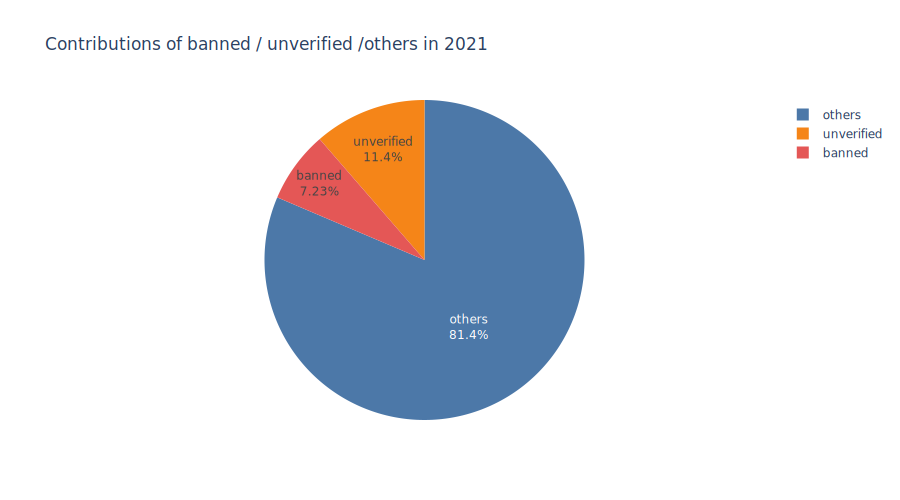

In [16]:
colors = px.colors.qualitative.T10

fig = px.pie(df_merged.banned_unverified.value_counts().to_frame().reset_index(),
             values='banned_unverified', names='index', color_discrete_sequence = colors,
             title = 'Contributions of banned / unverified /others in 2021')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

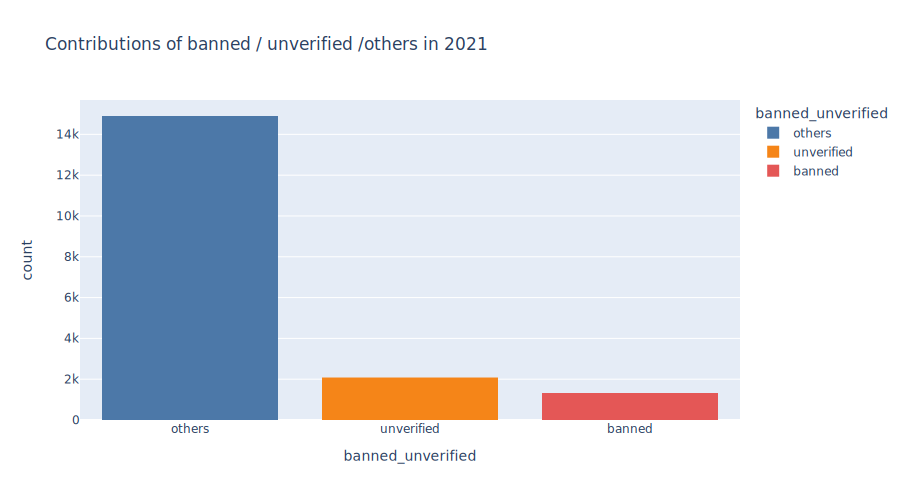

In [17]:
fig = px.histogram(df_merged, x='banned_unverified', color="banned_unverified", 
                    color_discrete_sequence = colors, 
                   title = 'Contributions of banned / unverified /others in 2021')
fig.show()

<a id='peak_contributions'></a>
>>### Peak Day Contributions

<ul>
<li><a href="#contributions">Contributions</a></li>
<li><a href="#peak_contributions"><b><mark>Peak Day Contributions</mark></b></a></li>
<li><a href="#submissions">Submissions</a></li>
<li><a href="#peak_submissions">Peak Day Submissions</a></li>
</ul>

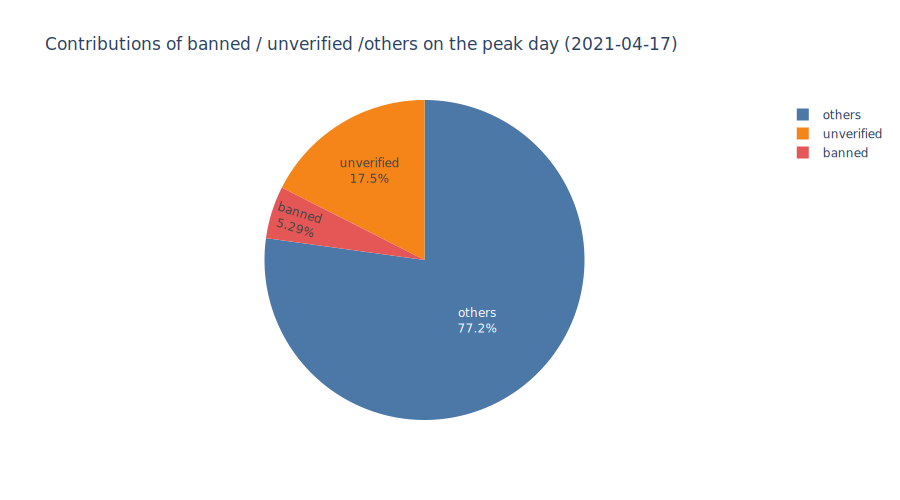

In [18]:
fig = px.pie(df_peak.banned_unverified.value_counts().to_frame().reset_index(),
             values='banned_unverified', names='index', color_discrete_sequence = colors,
             title = 'Contributions of banned / unverified /others on the peak day (2021-04-17)')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

**NOTE:** 23% of peak day contributions were made by banned accounts and acoounts with unverified email address

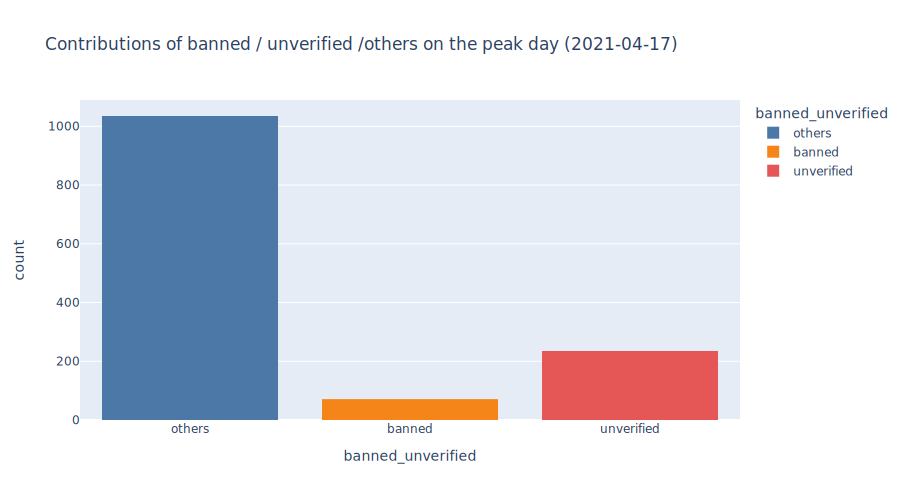

In [19]:
fig = px.histogram(df_peak, 
                   x='banned_unverified', color="banned_unverified", 
                   color_discrete_sequence = colors, 
                   category_orders = dict(creation_year=['2018', '2019', '2020', '2021', 'banned', 'others']),
                   title = 'Contributions of banned / unverified /others on the peak day (2021-04-17)')
fig.show()

<a id='submissions'></a>
>>### Submissions

<ul>
<li><a href="#contributions">Contributions</a></li>
<li><a href="#peak_contributions">Peak Day Contributions</a></li>
<li><a href="#submissions"><b><mark>Submissions</mark></b></a></li>
<li><a href="#peak_submissions">Peak Day Submissions</a></li>
</ul>

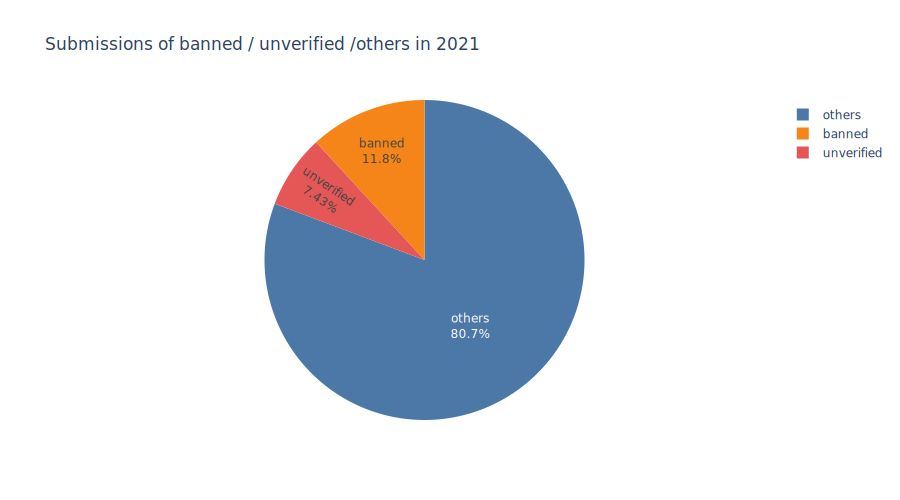

In [20]:
fig = px.pie(df_submissions.banned_unverified.value_counts().to_frame().reset_index(),
             values='banned_unverified', names='index', color_discrete_sequence = colors,
             title = 'Submissions of banned / unverified /others in 2021')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

**NOTE:** About 20% of 2021 submissions were made by banned and unverified accounts.

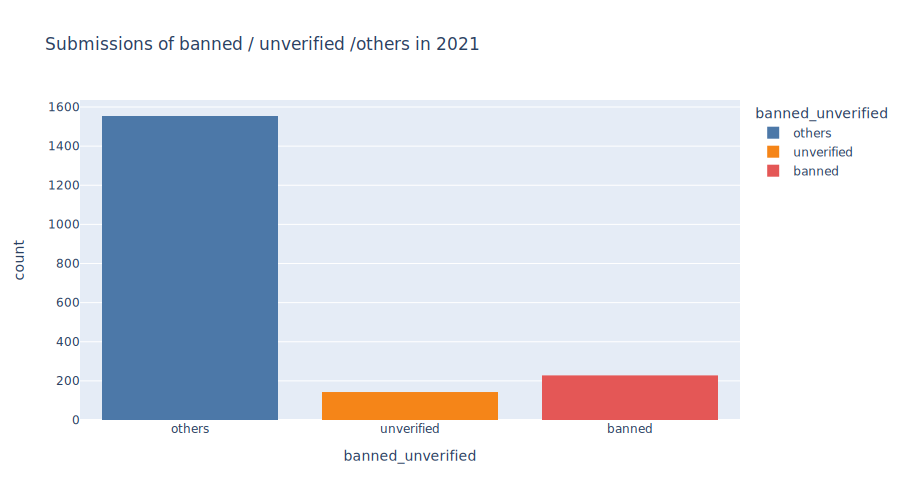

In [21]:
fig = px.histogram(df_submissions, x='banned_unverified', color="banned_unverified", 
                   color_discrete_sequence = colors, 
                   title = 'Submissions of banned / unverified /others in 2021')
fig.show()

<a id='peak_submissions'></a>
>>### Peak Day Submissions

<ul>
<li><a href="#contributions">Contributions</a></li>
<li><a href="#peak_contributions">Peak Day Contributions</a></li>
<li><a href="#submissions">Submissions</a></li>
<li><a href="#peak_submissions"><b><mark>Peak Day Submissions</mark></b></a></li>
</ul>

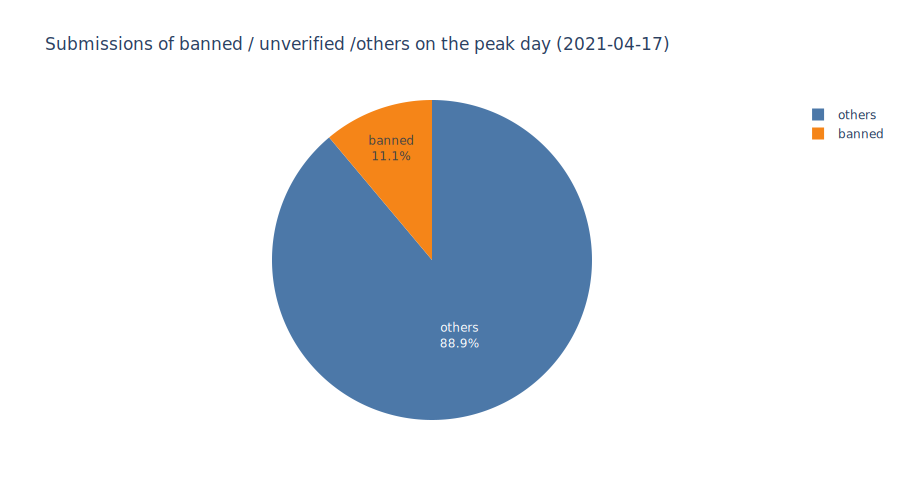

In [22]:
fig = px.pie(df_peak_submissions.banned_unverified.value_counts().to_frame().reset_index(),
             values='banned_unverified', names='index', color_discrete_sequence = colors,
             title = 'Submissions of banned / unverified /others on the peak day (2021-04-17)')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

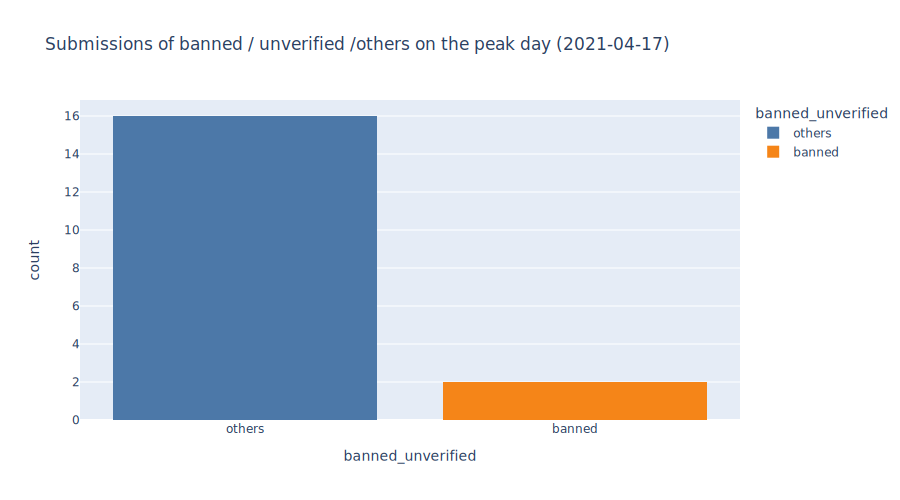

In [23]:
fig = px.histogram(df_peak_submissions, x='banned_unverified', color="banned_unverified", 
                    color_discrete_sequence = colors, 
                   title = 'Submissions of banned / unverified /others on the peak day (2021-04-17)')
fig.show()

<a id='explore_banned'></a>
># Banned Accounts

<ul>
<li><a href="#banned_unverified">Banned / Unverified</a></li>
<li><a href="#explore_banned"><b><mark>Banned Accounts</mark></b></a></li>
    <br>
<li><a href="#explore_unverified">Unverified Accounts</a></li>
    <br>
<li><a href="#new_others">New Vs Others</a></li>    
<li><a href="#explore_new">New Accounts</a></li>
    <br>
<li><a href="#contributions_scores">2021 Contributions Scores</a></li>
</ul>

<a id='banned_largest_scores'></a>
>>### Banned-Accounts largest scores

<ul>
<li><a href="#banned_largest_scores"><b><mark>Banned-Accounts largest scores</mark></b></a></li>
<li><a href="#banned_minimum_scores">Banned-Accounts minimum scores</a></li>
    <br>
<li><a href="#banned_contributions">Contributions of Banned accounts in 2021</a></li>
<li><a href="#banned_peaks">Banned Accounts Contributions Peaks</a></li>
</ul>

In [24]:
df_banned.score.describe()

count     1315.000000
mean        42.793156
std        455.733256
min       -189.000000
25%          1.000000
50%          2.000000
75%          7.000000
max      11476.000000
Name: score, dtype: float64

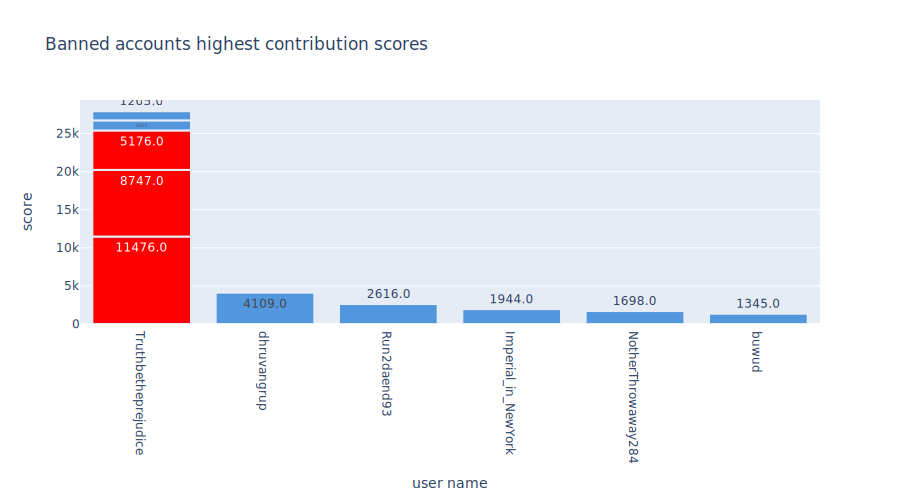

In [25]:
# Filter on largest scores

df_scores_high = df_banned.sort_values('score', ascending=False).head(10)

fig = px.bar(df_scores_high,
             x='user_name', 
             y=df_scores_high.score, text = df_scores_high.score, title='Banned accounts highest contribution scores')

fig.update_layout(
    xaxis = dict(
        title='user name',
        tickmode = 'array',
        tickvals = df_scores_high.user_name,
    )
)

clrs = ['red' if (y > 5000) else '#5296dd' for y in df_scores_high.score]

fig.update_traces(marker_color=clrs,
                  marker_line_width=2, opacity=1, textposition='auto')

# , marker_line_color='#5296dd'

fig.show()


**NOTE:** "Truthbetheprejudice": this user contributions got the hieghest scores. <br>
(Since this user is banned, we have no user information but, we can further investigate his contributions)

In [26]:
df_truth = df_banned[df_banned.user_name == 'Truthbetheprejudice'].sort_values('created_at')
df_truth.head()

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,...,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
15498,t3_mtioam,/r/MensRights/comments/mtioam/johnny_depp_seen...,"Johnny Depp Seen In Rare Photos In Spain, As H...",NaN,r/MensRights,2021-04-18 18:41:42,Positive,Neutral,1.0,NaN,...,True,True,True,NaN,NaN,NaT,banned,banned,NaN,NaN
15499,t3_mtjtsr,/r/movies/comments/mtjtsr/johnny_depp_makes_an...,Johnny Depp Makes an Appearance in Spain as La...,NaN,r/movies,2021-04-18 19:40:25,Positive,Negative,1.0,NaN,...,True,True,True,NaN,NaN,NaT,banned,banned,NaN,NaN
15500,t3_mtkogv,/r/entertainment/comments/mtkogv/johnny_depp_m...,Johnny Depp Makes an Appearance in Spain as La...,NaN,r/entertainment,2021-04-18 20:24:14,Positive,Negative,1.0,NaN,...,True,True,True,NaN,NaN,NaT,banned,banned,NaN,NaN
15501,t3_muyp3k,/r/MensRights/comments/muyp3k/justiceforjohnny...,#JusticeForJohnnyDepp Johnny Depp fans donate ...,NaN,r/MensRights,2021-04-20 19:47:45,Neutral,Negative,75.0,NaN,...,True,True,True,NaN,NaN,NaT,banned,banned,NaN,NaN
15502,t3_muypet,/r/entertainment/comments/muypet/justiceforjoh...,#JusticeForJohnnyDepp Johnny Depp fans donate ...,NaN,r/entertainment,2021-04-20 19:48:06,Neutral,Negative,1.0,NaN,...,True,True,True,NaN,NaN,NaT,banned,banned,NaN,NaN


In [27]:
df_truth.submission_comment.value_counts()

submission    43
Name: submission_comment, dtype: int64

**NOTE:** "Truthbetheprejudice": this user made 43 submissions, no comments at all.

In [28]:
df_truth.text.value_counts()

Johnny Depp sues ACLU on to see if ex-wife Amber Heard gave $7m divorce settlement                                                      5
Amber Heard Under Investigation for Perjury in Johnny Depp Domestic Violence Case                                                       5
Amber Heard probed for perjury and staging 2016 Johnny Depp domestic violence case: 'Lock her up'                                       5
Amber Heard to struggle in new LAPD domestic violence probe                                                                             5
Amber Heard Is Allegedly Being Investigated By LAPD For Perjury, Could Face Jail Time Over Johnny Depp Domestic Violence Accusations    5
Confirmed: Amber Heard Under Criminal Investigation in Australia                                                                        4
Remove Amber Heard from Aquaman 2                                                                                                       4
#JusticeForJohnnyDepp Johnny Depp 

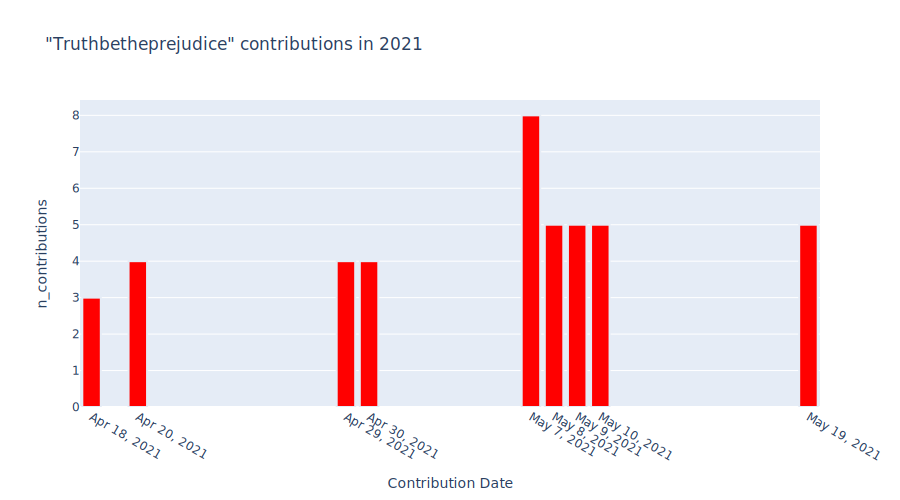

In [29]:
df_truth_contributions = df_truth.groupby(df_truth.created_at.dt.date).size().reset_index(name='n_contributions')

fig = px.bar(df_truth_contributions,
             x='created_at', 
             y='n_contributions', title='"Truthbetheprejudice" contributions in 2021')

fig.update_layout(
    xaxis = dict(
        title='Contribution Date',
        tickmode = 'array',
        tickvals = df_truth_contributions.created_at,
    )
)

fig.update_traces(marker_color='red',
                  marker_line_width=2, opacity=1, textposition='auto')
fig.show()

<a id='banned_minimum_scores'></a>
>>### Banned-Accounts minimum scores

<ul>
<li><a href="#banned_largest_scores">Banned-Accounts largest scores</a></li>
<li><a href="#banned_minimum_scores"><b><mark>Banned-Accounts minimum scores</mark></b></a></li>
    <br>
<li><a href="#banned_contributions">Contributions of Banned accounts in 2021</a></li>
<li><a href="#banned_peaks">Banned Accounts Contributions Peaks</a></li>
</ul>

https://stackoverflow.com/questions/67590028/plotly-how-to-move-x-axis-to-top-and-y-axis-to-the-right

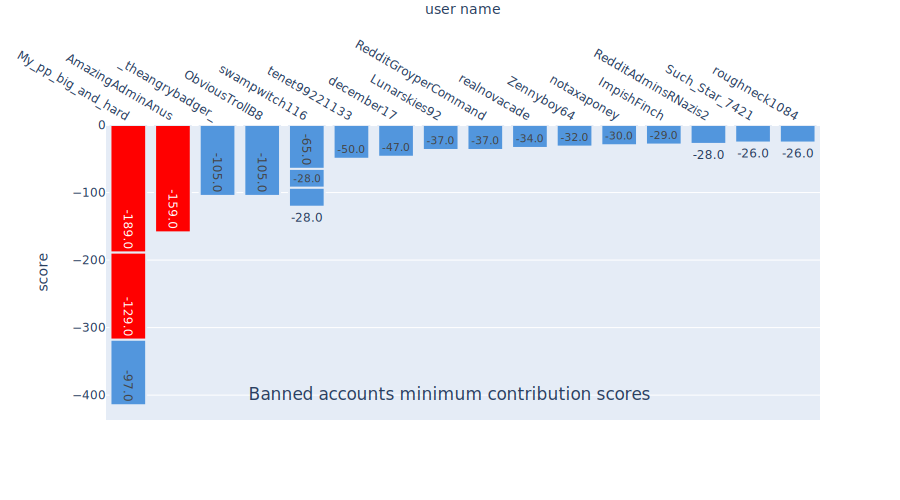

In [30]:
# Filter on minimum scores

df_scores_low = df_banned.sort_values('score').head(20)

fig = px.bar(df_scores_low,
             x='user_name', 
             y=df_scores_low.score, 
             text = df_scores_low.score)

fig.update_layout(title_text='Banned accounts minimum contribution scores', title_x=0.5, title_y=0.2)

fig.update_layout(
    xaxis = dict(
        side='top',
        title='user name',
        tickmode = 'array',
        tickvals = df_scores_low.user_name,
    )
)

clrs = ['red' if (y < -120) else '#5296dd' for y in df_scores_low.score]

fig.update_traces(marker_color=clrs,
                  marker_line_width=2, opacity=1, textposition='auto')


fig.show()


In [31]:
df_pp = df_banned[df_banned.user_name == 'My_pp_big_and_hard']
df_pp.sort_values('created_at', inplace=True);

Posting sexual comments

In [32]:
df_pp

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,...,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
5207,t1_giyqv2e,/r/pussypassdenied/comments/kv8enp/lawyer_brea...,I wanna fuck her tho,t1_gix73iy,r/pussypassdenied,2021-01-12 03:56:44,Negative,Negative,-189.0,comment,...,True,True,True,NaN,NaN,NaT,banned,banned,NaN,NaN
5208,t1_giyw8mi,/r/pussypassdenied/comments/kv8enp/lawyer_brea...,But im horny af :(,t1_giyvk4d,r/pussypassdenied,2021-01-12 04:46:36,Negative,Negative,-129.0,comment,...,True,True,True,NaN,NaN,NaT,banned,banned,NaN,NaN
5209,t1_giyx62k,/r/pussypassdenied/comments/kv8enp/lawyer_brea...,Can I stick you in you? 😳😳😳,t1_giyx1cz,r/pussypassdenied,2021-01-12 04:55:46,Neutral,Neutral,-97.0,comment,...,True,True,True,NaN,NaN,NaT,banned,banned,NaN,NaN
5210,t1_giyxmsv,/r/pussypassdenied/comments/kv8enp/lawyer_brea...,Hehehe \n#😆😆😆,t1_giyxg6o,r/pussypassdenied,2021-01-12 05:00:29,Neutral,Neutral,-19.0,comment,...,True,True,True,NaN,NaN,NaT,banned,banned,NaN,NaN
5211,t1_giz0jk1,/r/pussypassdenied/comments/kv8enp/lawyer_brea...,What if you she later calls and says you pumpe...,t1_giyzieh,r/pussypassdenied,2021-01-12 05:31:55,Neutral,Neutral,8.0,comment,...,True,True,True,NaN,NaN,NaT,banned,banned,NaN,NaN
5212,t1_giz1e85,/r/pussypassdenied/comments/kv8enp/lawyer_brea...,But it feels better to fuck women who you are ...,t1_giz10gy,r/pussypassdenied,2021-01-12 05:41:42,Positive,Neutral,-3.0,comment,...,True,True,True,NaN,NaN,NaT,banned,banned,NaN,NaN
5213,t1_giz627s,/r/pussypassdenied/comments/kv8enp/lawyer_brea...,OooooooooOoOOoOoHHHH!!,t1_giz5s7s,r/pussypassdenied,2021-01-12 06:39:55,Neutral,Neutral,-9.0,comment,...,True,True,True,NaN,NaN,NaT,banned,banned,NaN,NaN


In [33]:
df_pp.submission_comment.value_counts()

comment    7
Name: submission_comment, dtype: int64

In [34]:
# df_amazing.permalink[15599]

In [35]:
df_amazing = df_banned[df_banned.user_name == 'AmazingAdminAnus']
df_amazing.sort_values('created_at', inplace=True)
df_amazing;

In [36]:
df_amazing.submission_comment.value_counts()

comment    5
Name: submission_comment, dtype: int64

<a id='banned_contributions'></a>
>>### Contributions of Banned accounts in 2021

<ul>
<li><a href="#banned_largest_scores">Explore the largest scores</a></li>
<li><a href="#banned_minimum_scores">Explore the minimum scores</a></li>
    <br>
<li><a href="#banned_contributions"><b><mark>Contributions of Banned accounts in 2021</mark></b></a></li>
<li><a href="#banned_peaks">Banned Accounts Contributions Peaks</a></li>
</ul>

### Contributions

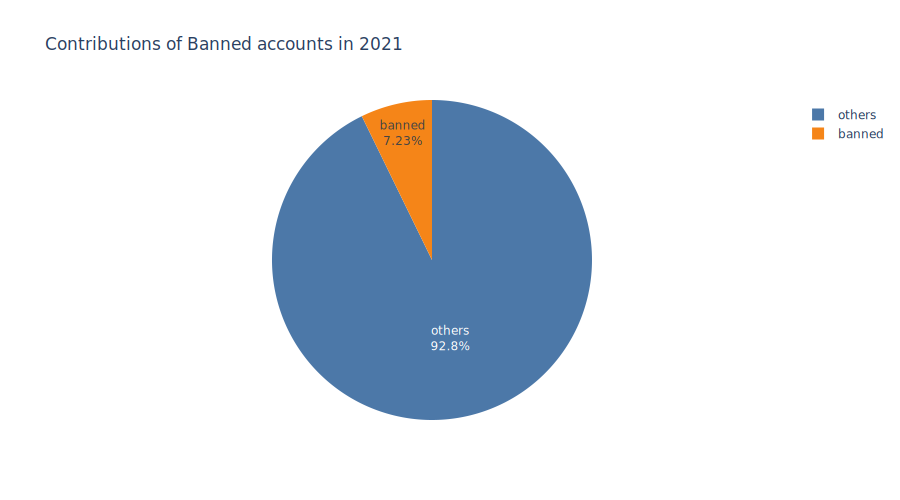

In [37]:
fig = px.pie(df_merged.is_banned.value_counts(),
             values='is_banned', names=['others', 'banned'], color_discrete_sequence = colors,
             title = 'Contributions of Banned accounts in 2021')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [38]:
print('The percentage % of 2021 contributions made by Banned accounts:')
banned_contr_prop = df_banned.shape[0] * 100 /df_merged.shape[0]
banned_contr_prop

The percentage % of 2021 contributions made by Banned accounts:


7.227533460803059

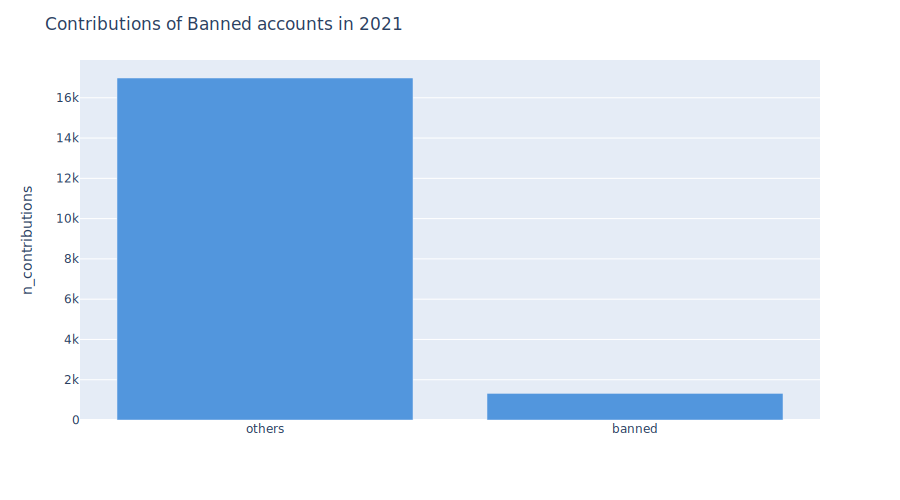

In [39]:
px.bar(data_frame=df_merged['is_banned'].value_counts(),
       x=['others', 'banned'], y="is_banned").update_layout(title='Contributions of Banned accounts in 2021',
                   xaxis_title='',
                   yaxis_title='n_contributions').update_traces(marker_color='#5296dd')


In [40]:
print('Total banned accounts contributions in 2021:')
df_banned.shape[0]

Total banned accounts contributions in 2021:


1323

### Comments

In [41]:
print('Total banned accounts comments in 2021:')
df_banned.query(" submission_comment == 'comment' ").shape[0]

Total banned accounts comments in 2021:


1095

In [42]:
df_banned.query(" submission_comment == 'comment' ").text.value_counts().head(5)

Stfu                    3
Good.                   2
Dm to chat about her    2
Kik: Nigel__420         2
Nobody cares            2
Name: text, dtype: int64

### Submissions

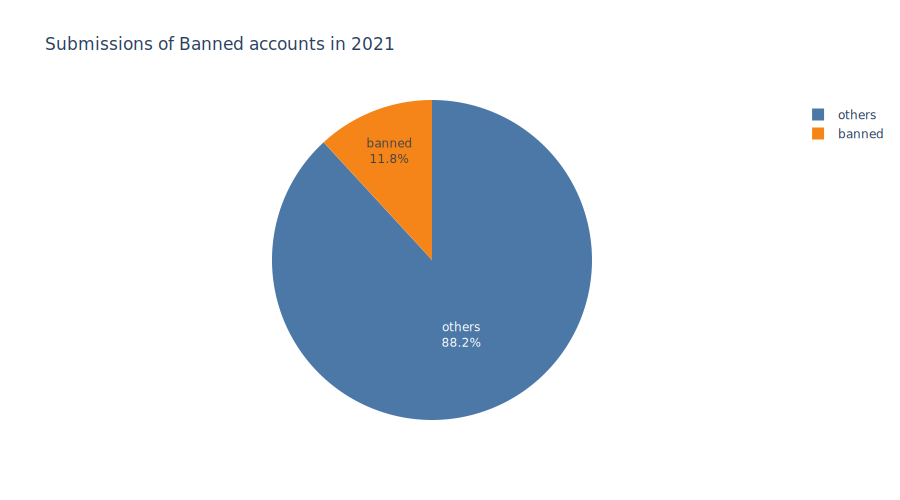

In [43]:
fig = px.pie(df_submissions.is_banned.value_counts(),
             values='is_banned', names=['others', 'banned'], color_discrete_sequence = colors,
             title = 'Submissions of Banned accounts in 2021')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [44]:
print('The percentage % of 2021 submissions made by Banned accounts:')
banned_sub_prop = df_banned.query(" submission_comment == 'submission' ").shape[0] * 100\
/df_merged.query(" submission_comment == 'submission' ").shape[0]

banned_sub_prop

The percentage % of 2021 submissions made by Banned accounts:


11.844155844155845

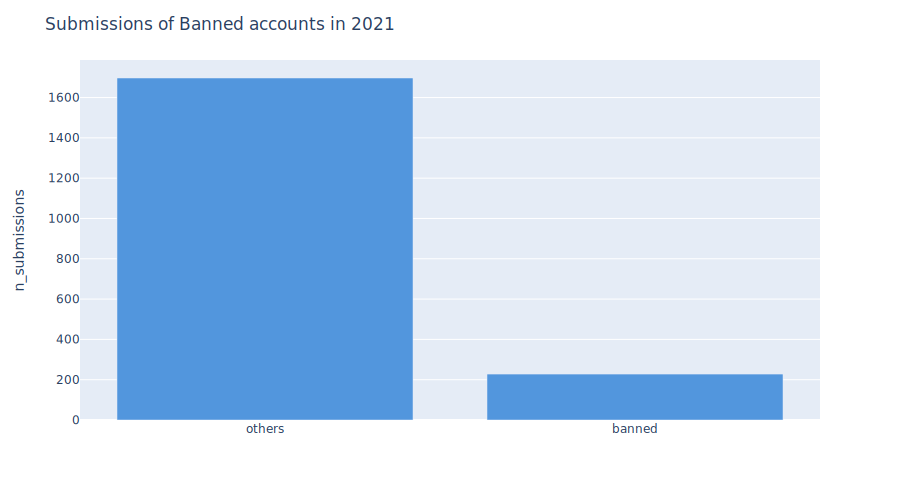

In [45]:
px.bar(data_frame=df_submissions['is_banned'].value_counts(),
       x=['others', 'banned'], y="is_banned").update_layout(title='Submissions of Banned accounts in 2021',
                   xaxis_title='',
                   yaxis_title='n_submissions').update_traces(marker_color='#5296dd')


In [46]:
print('Total banned accounts submissions in 2021:')
df_banned.query(" submission_comment == 'submission' ").shape[0]

Total banned accounts submissions in 2021:


228

In [47]:
df_banned.query(" submission_comment == 'submission' ").text.value_counts().head(5)

Amber Heard                                                                                                                             18
Amber Heard Touching Herself                                                                                                            17
Remove Amber Heard from Aquaman 2                                                                                                        6
Amber Heard Is Allegedly Being Investigated By LAPD For Perjury, Could Face Jail Time Over Johnny Depp Domestic Violence Accusations     6
Amber Heard to struggle in new LAPD domestic violence probe                                                                              5
Name: text, dtype: int64

In [48]:
txt = 'Amber Heard Touching Herself'
df_banned[df_banned['text'] == txt][['user_name', 'subreddit', 'created_at']]

# Nothe that we don't have data on banned users except for their names

,user_name,subreddit,created_at
13831,90police,r/90sTits,2021-04-14 13:04:09
13832,90police,r/CMNF,2021-04-14 13:04:29
13833,90police,r/fyiff,2021-04-14 13:04:54
13834,90police,r/JanaDefi,2021-04-14 13:05:13
13835,90police,r/indiansgetlaid,2021-04-14 13:05:42
13836,90police,r/nonwhitebimbos,2021-04-14 13:06:00
13837,90police,r/Tgirlguru,2021-04-14 13:06:15
13838,90police,r/soniafucks,2021-04-14 13:06:31
13839,90police,r/GloriaV,2021-04-14 13:06:49
13840,90police,r/TheFamilyTrap,2021-04-14 13:07:07


**NOTE:** "90police": this user made 17 submissions within only 5 minutes!! <br>
(Sexual Content)

In [49]:
txt = 'Remove Amber Heard from Aquaman 2'
df_banned[df_banned['text'] == txt][['user_name', 'subreddit', 'created_at']]

# Nothe that we don't have data on banned users except for their names

,user_name,subreddit,created_at
3252,the-speed-of-pain,r/pussypassdenied,2021-02-20 11:08:44
3253,the-speed-of-pain,r/JusticeForJohnnyDepp,2021-02-20 11:08:47
15505,Truthbetheprejudice,r/pussypassdenied,2021-04-29 18:36:22
15506,Truthbetheprejudice,r/entertainment,2021-04-29 18:36:27
15507,Truthbetheprejudice,r/MensRights,2021-04-29 18:36:40
15508,Truthbetheprejudice,r/movies,2021-04-29 18:36:53


**NOTE:** 
- "Truthbetheprejudice": this user made 4 submissions with the same text "Remove Amber Heard from Aquaman 2" within only 30 seconds!! <br>

- "the-speed-of-pain": this user made 2 submissions with the same text "Remove Amber Heard from Aquaman 2" within only 3 seconds!!

<a id='banned_peaks'></a>
>>### Banned Accounts Contributions Peaks

<ul>
<li><a href="#banned_largest_scores">Explore the largest scores</a></li>
<li><a href="#banned_minimum_scores">Explore the minimum scores</a></li>
    <br>
<li><a href="#banned_contributions">Contributions of Banned accounts in 2021</a></li>
<li><a href="#banned_peaks"><b><mark>Banned Accounts Contributions Peaks</mark></b></a></li>
</ul>

### Which dates had the highest contrbitions of banned users?

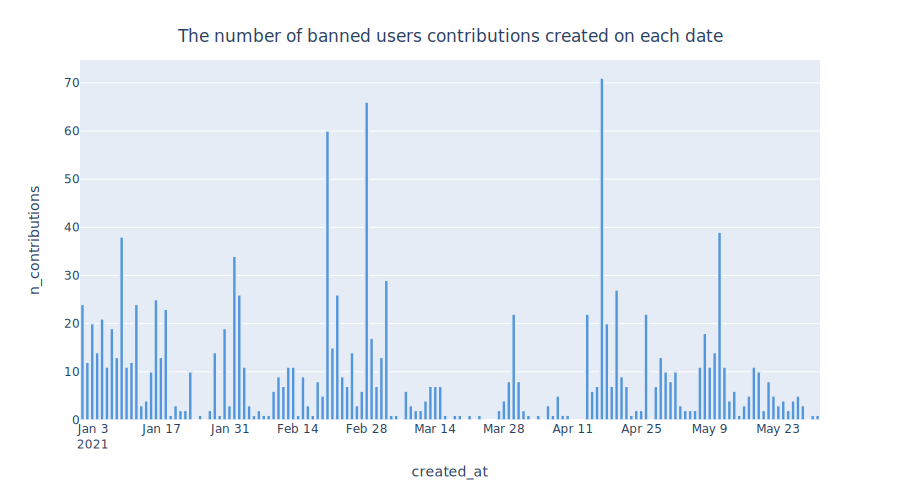

In [50]:
# group by date an count
banned_contributions = df_banned.groupby(df_banned.created_at.dt.date).size().reset_index(name='n_contributions')

fig = px.bar(banned_contributions,
             x='created_at', y='n_contributions')

fig.update_layout(
            title={
        'text': "The number of banned users contributions created on each date",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        })

fig.update_traces(marker_color='#5296dd',
                  marker_line_width=1.5, opacity=1, textposition='auto').update_layout()
fig.show()

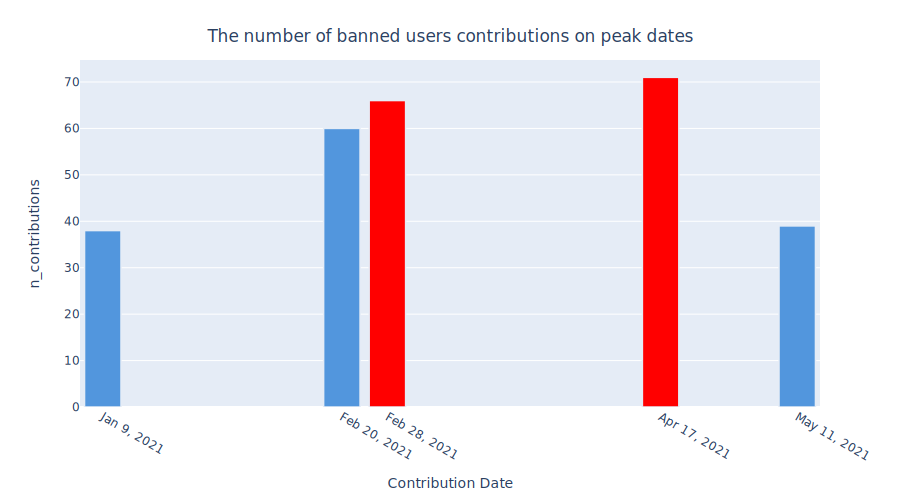

In [51]:
# sort by n_contributions, take the top 3, then sort them by date 
banned_contributions.sort_values('n_contributions', ascending=False, inplace=True)
banned_trendy = banned_contributions.head(5)
banned_trendy.sort_values('created_at', inplace=True)

fig = px.bar(banned_trendy,
             x='created_at', y='n_contributions')

fig.update_layout(
            title={
        'text': "The number of banned users contributions on peak dates",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        })

fig.update_layout(
    xaxis = dict(
        title='Contribution Date',
        tickmode = 'array',
        tickvals = banned_trendy.created_at,
    )
)

clrs = ['red' if (y > 60) else '#5296dd' for y in banned_trendy['n_contributions']] 

fig.update_traces(marker_color=clrs,
                  marker_line_width=1.5, opacity=1, textposition='auto').update_layout()
fig.show()

<a id='explore_unverified'></a>
># Unverified Accounts

<ul>
<li><a href="#banned_unverified">Banned / Unverified</a></li>    
<li><a href="#explore_banned">Banned Accounts</a></li>
    <br>
<li><a href="#explore_unverified"><b><mark>Unverified Accounts</mark></b></a></li>
    <br>
<li><a href="#new_others">New Vs Others</a></li>
<li><a href="#explore_new">New Accounts</a></li>
    <br>
<li><a href="#contributions_scores">2021 Contributions Scores</a></li>
</ul>

<a id='largest_link_karma'></a>
>>### Explore unverified accounts with the largest link karma

<ul>
<li><a href="#largest_link_karma"><b><mark>Unverified Accounts With The Largest Link Karma</mark></b></a></li>   
<li><a href="#largest_comment_karma">Unverified Accounts With The Largest Comment Karma</a></li>
    <br>
<li><a href="#minimum_link_karma">Unverified Accounts With The Minimum Link Karma</a></li>
<li><a href="#minimum_comment_karma">Unverified Accounts With The Minimum Comment Karma</a></li>
    <br>
<li><a href="#largest_scores">Explore the largest scores</a></li>
<li><a href="#minimum_scores">Explore the minimum scores</a></li>
    <br>
<li><a href="#unverified_contributions">Contributions of Unverified accounts in 2021</a></li>
<li><a href="#unverified_creations">Creation years of the unverified accounts contributed in 2021</a></li>
<li><a href="#unverified_peak">Unverified Contributions Peaks</a></li>
</ul>

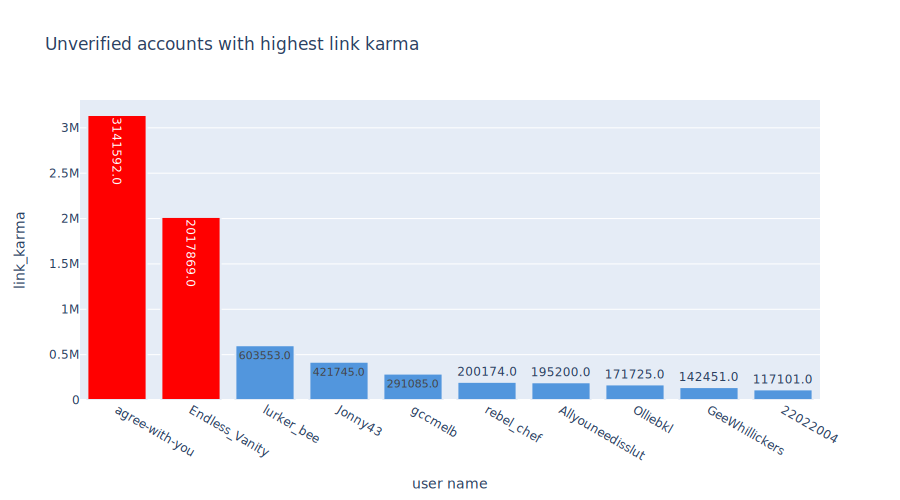

In [52]:
# Filter on largest link karma

df_link_high = df_unverified.sort_values('link_karma', ascending=False).head(10)

fig = px.bar(df_link_high,
             x='user_name', 
             y=df_link_high.link_karma, text = df_link_high.link_karma, title='Unverified accounts with highest link karma')

fig.update_layout(
    xaxis = dict(
        title='user name',
        tickmode = 'array',
        tickvals = df_link_high.user_name,
    )
)

clrs = ['red' if (y > 2000000) else '#5296dd' for y in df_link_high.link_karma]

fig.update_traces(marker_color=clrs,
                  marker_line_width=2, opacity=1, textposition='auto')

# , marker_line_color='#5296dd'

fig.show()


In [53]:
with pd.option_context('display.max_colwidth', None, 'display.max_columns', None):
  display(df_unverified[df_unverified.user_name == 'agree-with-you'].head(1))

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,submission_comment,submission_text,user_name,has_verified_email,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
11889,t1_gplvb3x,/r/TrueOffMyChest/comments/lx2s7w/its_disgusting_that_people_are_less_angry_about/gplvb3x/,"I agree, this does not seem possible.",t1_gplva7c,r/TrueOffMyChest,2021-03-04 02:14:19,Neutral,Positive,-1.0,comment,comment,its_disgusting_that_people_are_less_angry_about,agree-with-you,False,False,False,False,3141592.0,3141592.0,2018-03-11 00:17:42,unverified,2018,1089 days 01:56:37,1089.0


In [54]:
with pd.option_context('display.max_colwidth', None, 'display.max_columns', None):
  display(df_unverified[df_unverified.user_name == 'Endless_Vanity'].head(1))

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,submission_comment,submission_text,user_name,has_verified_email,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
3557,t1_gi5kiwu,/r/AskReddit/comments/kqrzft/amber_heard_just_shit_on_your_bed_what_do_you_do/gi5kiwu/,Put it for sale on Ebay and wait for the thousands to pour in.,t3_kqrzft,r/AskReddit,2021-01-05 06:00:24,Neutral,Neutral,5.0,submission,comment,amber_heard_just_shit_on_your_bed_what_do_you_do,Endless_Vanity,False,True,True,False,312743.0,2017869.0,2014-11-09 18:30:46,unverified,others,2248 days 11:29:38,2248.0


<a id='largest_comment_karma'></a>
>>### Explore unverified accounts with the largest comment karma

<ul>
<li><a href="#largest_link_karma">Unverified Accounts With The Largest Link Karma</a></li>   
<li><a href="#largest_comment_karma"><b><mark>Unverified Accounts With The Largest Comment Karma</mark></b></a></li>
    <br>
<li><a href="#minimum_link_karma">Unverified Accounts With The Minimum Link Karma</a></li>
<li><a href="#minimum_comment_karma">Unverified Accounts With The Minimum Comment Karma</a></li>
    <br>
<li><a href="#largest_scores">Explore the largest scores</a></li>
<li><a href="#minimum_scores">Explore the minimum scores</a></li>
    <br>
<li><a href="#unverified_contributions">Contributions of Unverified accounts in 2021</a></li>
<li><a href="#unverified_creations">Creation years of the unverified accounts contributed in 2021</a></li>
<li><a href="#unverified_peak">Unverified Contributions Peaks</a></li>
</ul>

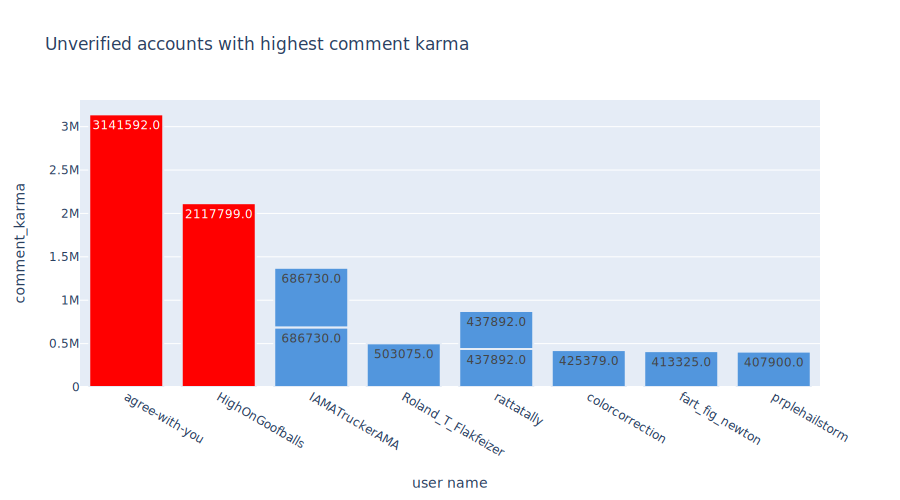

In [55]:
# Filter on largest comment karma

df_comment_high = df_unverified.sort_values('comment_karma', ascending=False).head(10)

fig = px.bar(df_comment_high,
             x='user_name', 
             y=df_comment_high.comment_karma, text = df_comment_high.comment_karma, title='Unverified accounts with highest comment karma')

fig.update_layout(
    xaxis = dict(
        title='user name',
        tickmode = 'array',
        tickvals = df_comment_high.user_name,
    )
)

clrs = ['red' if (y > 2000000) else '#5296dd' for y in df_comment_high.comment_karma]

fig.update_traces(marker_color=clrs,
                  marker_line_width=2, opacity=1, textposition='auto')

# , marker_line_color='#5296dd'

fig.show()



https://www.reddit.com/r/TrueOffMyChest/comments/lx2s7w/its_disgusting_that_people_are_less_angry_about/gplvb3x/

In [56]:
df_unverified[df_unverified.user_name == 'agree-with-you']

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,...,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
11889,t1_gplvb3x,/r/TrueOffMyChest/comments/lx2s7w/its_disgusti...,"I agree, this does not seem possible.",t1_gplva7c,r/TrueOffMyChest,2021-03-04 02:14:19,Neutral,Positive,-1.0,comment,...,False,False,False,3141592.0,3141592.0,2018-03-11 00:17:42,unverified,2018,1089 days 01:56:37,1089.0


Account Created at: 2018-03-11 <br>
Comment Created at: 2021-03-04 

In [57]:
with pd.option_context('display.max_colwidth', None, 'display.max_columns', None):
  display(df_unverified[df_unverified.user_name == 'HighOnGoofballs'].head(1))

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,submission_comment,submission_text,user_name,has_verified_email,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
9876,t1_go80vr4,/r/movies/comments/low6va/emilia_clarke_to_replace_amber_heard_as_mera_in/go80vr4/,How do you know they suck if you haven’t seen them?,t1_go80mn8,r/movies,2021-02-21 12:58:42,Neutral,Negative,3.0,comment,comment,emilia_clarke_to_replace_amber_heard_as_mera_in,HighOnGoofballs,False,True,False,False,2117799.0,32205.0,2015-08-15 00:54:10,unverified,others,2017 days 12:04:32,2017.0


<a id='minimum_link_karma'></a>
>>### Explore unverified accounts with the minimum link karma

<ul>
<li><a href="#largest_link_karma">Unverified Accounts With The Largest Link Karma</a></li>   
<li><a href="#largest_comment_karma">Unverified Accounts With The Largest Comment Karma</a></li>
    <br>
<li><a href="#minimum_link_karma"><b><mark>Unverified Accounts With The Minimum Link Karma</mark></b></a></li>
<li><a href="#minimum_comment_karma">Unverified Accounts With The Minimum Comment Karma</a></li>
    <br>
<li><a href="#largest_scores">Explore the largest scores</a></li>
<li><a href="#minimum_scores">Explore the minimum scores</a></li>
    <br>
<li><a href="#unverified_contributions">Contributions of Unverified accounts in 2021</a></li>
<li><a href="#unverified_creations">Creation years of the unverified accounts contributed in 2021</a></li>
<li><a href="#unverified_peak">Unverified Contributions Peaks</a></li>
</ul>

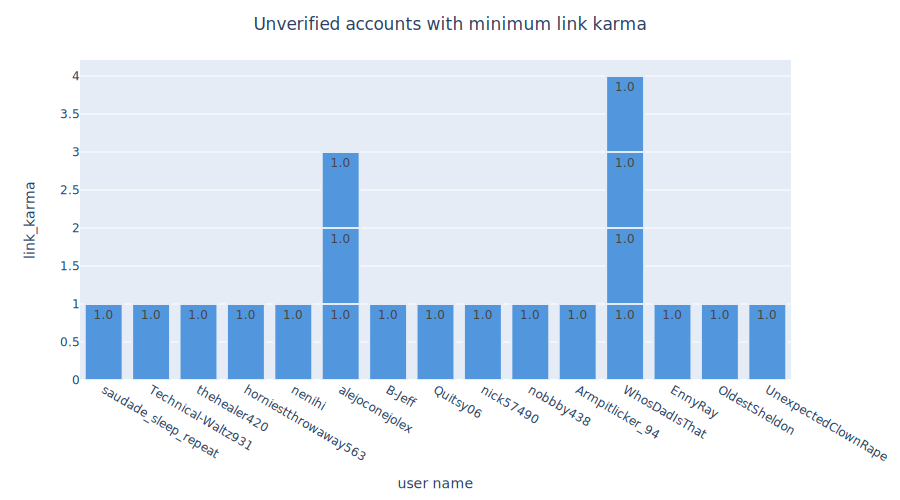

In [58]:
# Filter on minimum link karma

df_link_low = df_unverified.sort_values('link_karma').head(20)

fig = px.bar(df_link_low,
             x='user_name', 
             y=df_link_low.link_karma, 
             text = df_link_low.link_karma)

fig.update_layout(title_text='Unverified accounts with minimum link karma', title_x=0.5)

fig.update_layout(
    xaxis = dict(
        title='user name',
        tickmode = 'array',
        tickvals = df_link_low.user_name,
    )
)

clrs = ['red' if (y < -60) else '#5296dd' for y in df_link_low.link_karma]

fig.update_traces(marker_color=clrs,
                  marker_line_width=2, opacity=1, textposition='auto')


fig.show()

<a id='minimum_comment_karma'></a>
>>### Explore unverified accounts with the minimum comment karma

<ul>
<li><a href="#largest_link_karma">Unverified Accounts With The Largest Link Karma</a></li>   
<li><a href="#largest_comment_karma">Unverified Accounts With The Largest Comment Karma</a></li>
    <br>
<li><a href="#minimum_link_karma">Unverified Accounts With The Minimum Link Karma</a></li>
<li><a href="#minimum_comment_karma"><b><mark>Unverified Accounts With The Minimum Comment Karma</mark></b></a></li>
    <br>
<li><a href="#largest_scores">Explore the largest scores</a></li>
<li><a href="#minimum_scores">Explore the minimum scores</a></li>
    <br>
<li><a href="#unverified_contributions">Contributions of Unverified accounts in 2021</a></li>
<li><a href="#unverified_creations">Creation years of the unverified accounts contributed in 2021</a></li>
<li><a href="#unverified_peak">Unverified Contributions Peaks</a></li>
</ul>

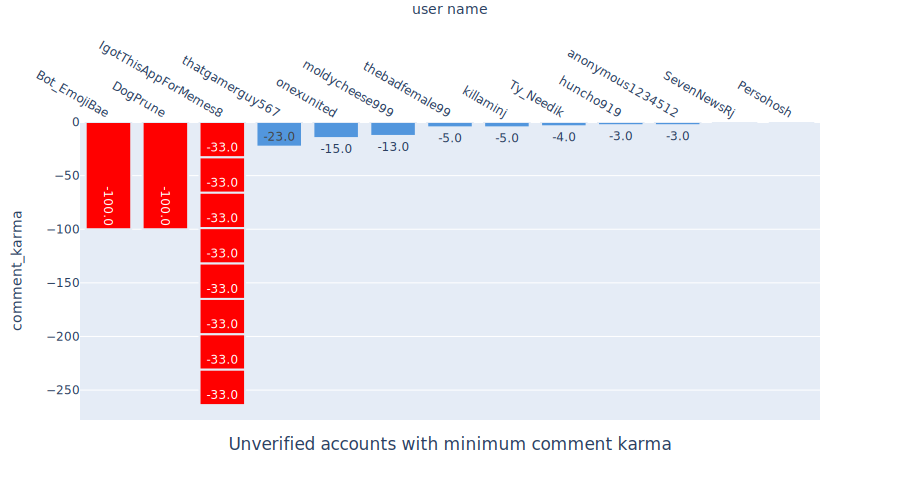

In [59]:
# Filter on minimum comment karma

df_comment_low = df_unverified.sort_values('comment_karma').head(20)

fig = px.bar(df_comment_low,
             x='user_name', 
             y=df_comment_low.comment_karma, 
             text = df_comment_low.comment_karma)

fig.update_layout(title_text='Unverified accounts with minimum comment karma', title_x=0.5, title_y=0.1)

fig.update_layout(
    xaxis = dict(
        side='top',
        title='user name',
        tickmode = 'array',
        tickvals = df_comment_low.user_name,
    )
)

clrs = ['red' if (y < -30) else '#5296dd' for y in df_comment_low.comment_karma]

fig.update_traces(marker_color=clrs,
                  marker_line_width=2, opacity=1, textposition='auto')


fig.show() 

In [60]:
df_unverified[df_unverified.user_name == 'Bot_EmojiBae']

# Defending AH

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,...,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
11520,t1_gpiyb1b,/r/copypasta/comments/lwskfd/amber_heard_what/...,There is a giant fucking internet incel moveme...,t3_lwskfd,r/copypasta,2021-03-03 12:18:16,Negative,Neutral,1.0,submission,...,False,False,False,-100.0,1.0,2021-02-13 02:18:31,unverified,2021,18 days 09:59:45,18.0


In [61]:
df_unverified[df_unverified.user_name == 'DogPrune']

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,...,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
7267,t1_glhiqhb,/r/TIHI/comments/l9bdw3/thanks_i_hate_johnny_d...,r/bonehurtingjuice,t3_l9bdw3,r/TIHI,2021-01-31 15:25:34,Neutral,Neutral,4.0,submission,...,True,False,False,-100.0,35.0,2020-12-25 20:20:09,unverified,2020,36 days 19:05:25,36.0


In [62]:
df_unverified[df_unverified.user_name == 'IgotThisAppForMemes8'];

# Defending AH

<a id='largest_scores'></a>
>>### Explore the largest scores

<ul>
<li><a href="#largest_link_karma">Unverified Accounts With The Largest Link Karma</a></li>   
<li><a href="#largest_comment_karma">Unverified Accounts With The Largest Comment Karma</a></li>
    <br>
<li><a href="#minimum_link_karma">Unverified Accounts With The Minimum Link Karma</a></li>
<li><a href="#minimum_comment_karma">Unverified Accounts With The Minimum Comment Karma</a></li>
    <br>
<li><a href="#largest_scores"><b><mark>Explore the largest scores</mark></b></a></li>
<li><a href="#minimum_scores">Explore the minimum scores</a></li>
    <br>
<li><a href="#unverified_contributions">Contributions of Unverified accounts in 2021</a></li>
<li><a href="#unverified_creations">Creation years of the unverified accounts contributed in 2021</a></li>
<li><a href="#unverified_peak">Unverified Contributions Peaks</a></li>
</ul>

In [63]:
df_unverified.score.describe()

count    2078.000000
mean       16.089028
std       121.927349
min       -73.000000
25%         1.000000
50%         2.000000
75%         6.000000
max      3745.000000
Name: score, dtype: float64

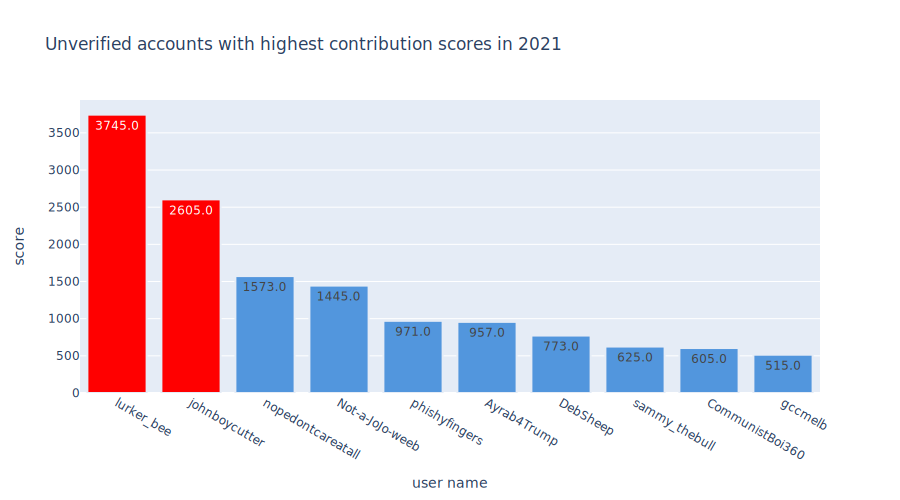

In [64]:
# Filter on largest scores

df_scores_high = df_unverified.sort_values('score', ascending=False).head(10)

fig = px.bar(df_scores_high,
             x='user_name', 
             y=df_scores_high.score, text = df_scores_high.score, title='Unverified accounts with highest contribution scores in 2021')

fig.update_layout(
    xaxis = dict(
        title='user name',
        tickmode = 'array',
        tickvals = df_scores_high.user_name,
    )
)

clrs = ['red' if (y > 2500) else '#5296dd' for y in df_scores_high.score]

fig.update_traces(marker_color=clrs,
                  marker_line_width=2, opacity=1, textposition='auto')


fig.show()

In [65]:
with pd.option_context('display.max_colwidth', None, 'display.max_columns', None):
  display(df_unverified[df_unverified.user_name == 'lurker_bee'].head(1))

# Negative Submission

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,submission_comment,submission_text,user_name,has_verified_email,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
17566,t3_naqo5d,/r/entertainment/comments/naqo5d/amber_heard_reportedly_probed_by_lapd_facing/,"Amber Heard Reportedly Probed By LAPD, Facing Years of Jail Time",NaN,r/entertainment,2021-05-12 14:56:49,Negative,Neutral,3745.0,NaN,submission,amber_heard_reportedly_probed_by_lapd_facing,lurker_bee,False,True,False,False,46000.0,603553.0,2013-06-30 05:32:46,unverified,others,2873 days 09:24:03,2873.0


https://www.reddit.com/r/entertainment/comments/naqo5d/amber_heard_reportedly_probed_by_lapd_facing/

LAPD --> Los Angeles Police Department

In [66]:
# df_unverified[df_unverified.user_name == 'johnboycutter'].permalink[3540]

In [67]:
with pd.option_context('display.max_colwidth', None):
  display(df_unverified[df_unverified.user_name == 'johnboycutter'].head(1))

# Negative Submissions and Comments

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,...,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
3538,t3_kqowtw,/r/videos/comments/kqowtw/its_official_amber_heard_lied_did_not_donate_7/,"It's official AMBER HEARD lied!: did not Donate 7 million divorce settlement which she PROMISED and stated to have donated in court under oath. 3,5 million are unaccounted, her legal team refuses to & is actively fighting against having to provide donation evidence",NaN,r/videos,2021-01-05 02:58:44,Positive,Neutral,1.0,NaN,...,False,False,False,4796.0,15565.0,2016-03-26 12:47:09,unverified,others,1745 days 14:11:35,1745.0


<a id='minimum_scores'></a>
>>### Explore the minimum scores

<ul>
<li><a href="#largest_link_karma">Unverified Accounts With The Largest Link Karma</a></li>   
<li><a href="#largest_comment_karma">Unverified Accounts With The Largest Comment Karma</a></li>
    <br>
<li><a href="#minimum_link_karma">Unverified Accounts With The Minimum Link Karma</a></li>
<li><a href="#minimum_comment_karma">Unverified Accounts With The Minimum Comment Karma</a></li>
    <br>
<li><a href="#largest_scores">Explore the largest scores</a></li>
<li><a href="#minimum_scores"><b><mark>Explore the minimum scores</mark></b></a></li>
    <br>
<li><a href="#unverified_contributions">Contributions of Unverified accounts in 2021</a></li>
<li><a href="#unverified_creations">Creation years of the unverified accounts contributed in 2021</a></li>
<li><a href="#unverified_peak">Unverified Contributions Peaks</a></li>
</ul>

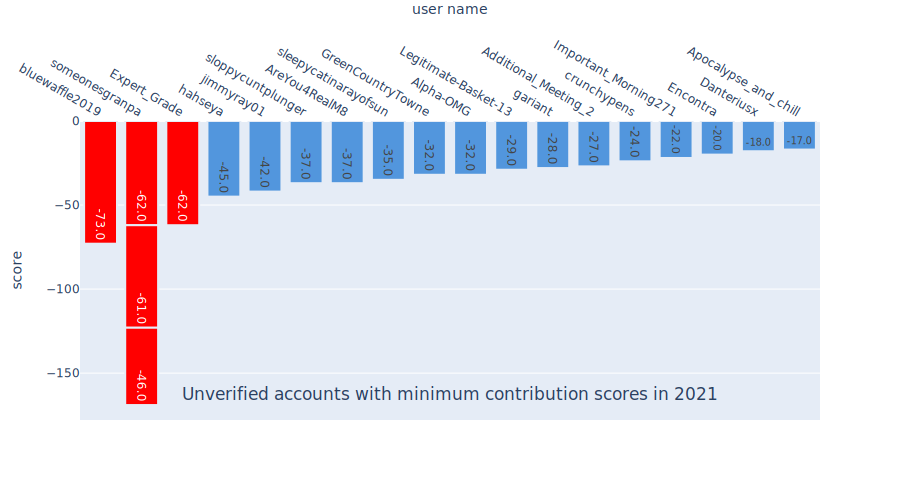

In [68]:
# Filter on minimum scores

df_scores_low = df_unverified.sort_values('score').head(20)

fig = px.bar(df_scores_low,
             x='user_name', 
             y=df_scores_low.score, 
             text = df_scores_low.score)

fig.update_layout(title_text='Unverified accounts with minimum contribution scores in 2021', title_x=0.5, title_y=0.2)

fig.update_layout(
    xaxis = dict(
        side='top',
        title='user name',
        tickmode = 'array',
        tickvals = df_scores_low.user_name,
    )
)

clrs = ['red' if (y < -45) else '#5296dd' for y in df_scores_low.score]

fig.update_traces(marker_color=clrs,
                  marker_line_width=2, opacity=1, textposition='auto')


fig.show()



In [69]:
df_unverified[df_unverified.user_name == 'bluewaffle2019']

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,...,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
11658,t1_gplcmal,/r/TrueOffMyChest/comments/lx2s7w/its_disgusti...,So how did you feel when Depp publicly threate...,t1_gpkyjx4,r/TrueOffMyChest,2021-03-03 23:26:57,Neutral,Neutral,-73.0,comment,...,False,False,False,24097.0,93.0,2019-08-12 10:10:21,unverified,2019,569 days 13:16:36,569.0


In [70]:
with pd.option_context('display.max_colwidth', None, 'display.max_columns', None):
  display(df_unverified[df_unverified.user_name == 'someonesgranpa'].head(1))

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,submission_comment,submission_text,user_name,has_verified_email,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
9039,t1_go4k204,/r/entertainment/comments/lo748q/emilia_clarke_to_replace_amber_heard_as_mera_in/go4k204/,She’s way too expensive. DC absolutely cannot afford her for a “side-kick” role.,t1_go4gnh1,r/entertainment,2021-02-20 15:25:59,Negative,Neutral,-61.0,comment,comment,emilia_clarke_to_replace_amber_heard_as_mera_in,someonesgranpa,False,False,False,False,4448.0,33.0,2021-01-13 00:48:37,unverified,2021,38 days 14:37:22,38.0


In [71]:
with pd.option_context('display.max_colwidth', None):
  display(df_unverified[df_unverified.user_name == 'Expert_Grade'].head(2))

# Defending AH

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,...,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
4562,t1_ginffyl,/r/EntitledBitch/comments/ktkm8u/fuck_amber_heard/ginffyl/,Johnny Depp beat her then tried to silence her.\n\nReddit hates women.\n\n\nSo...,t1_gin6f9c,r/EntitledBitch,2021-01-09 12:36:22,Neutral,Negative,-62.0,comment,...,False,False,False,1774.0,160.0,2020-08-25 15:46:24,unverified,2020,136 days 20:49:58,136.0
4563,t1_ginuzgy,/r/EntitledBitch/comments/ktkm8u/fuck_amber_heard/ginuzgy/,Simping for a drug war propagandist who left River Phoenix to die.,t1_ginqn71,r/EntitledBitch,2021-01-09 15:36:35,Neutral,Negative,-15.0,comment,...,False,False,False,1774.0,160.0,2020-08-25 15:46:24,unverified,2020,136 days 23:50:11,136.0


https://www.reddit.com/r/EntitledBitch/comments/ktkm8u/fuck_amber_heard/ginffyl/

<a id='unverified_contributions'></a>
>>### Contributions of Unverified accounts in 2021

<ul>
<li><a href="#largest_link_karma">Unverified Accounts With The Largest Link Karma</a></li>   
<li><a href="#largest_comment_karma">Unverified Accounts With The Largest Comment Karma</a></li>
    <br>
<li><a href="#minimum_link_karma">Unverified Accounts With The Minimum Link Karma</a></li>
<li><a href="#minimum_comment_karma">Unverified Accounts With The Minimum Comment Karma</a></li>
    <br>
<li><a href="#largest_scores">Explore the largest scores</a></li>
<li><a href="#minimum_scores">Explore the minimum scores</a></li>
    <br>
<li><a href="#unverified_contributions"><b><mark>Contributions of Unverified accounts in 2021</mark></b></a></li>
<li><a href="#unverified_creations">Creation years of the unverified accounts contributed in 2021</a></li>
<li><a href="#unverified_peak">Unverified Contributions Peaks</a></li>
</ul>

>>### Unverified accounts contributions in 2021

### Contributions

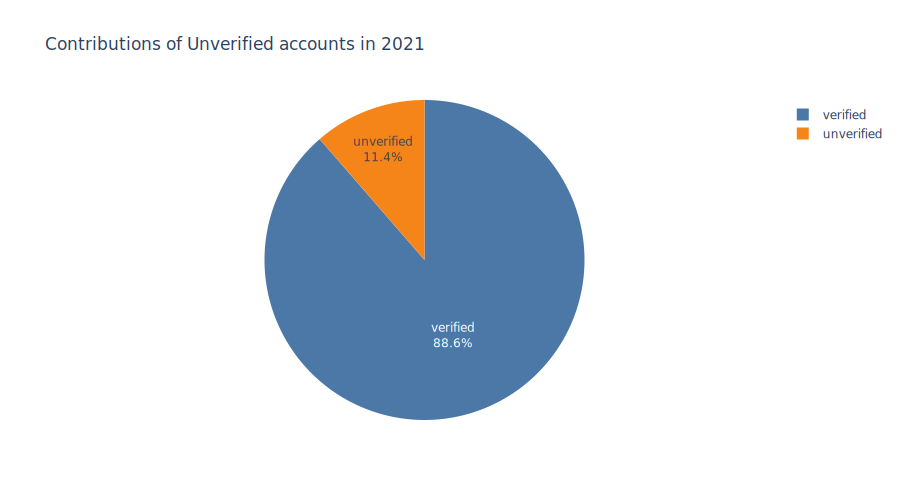

In [72]:
fig = px.pie(df_merged.has_verified_email.value_counts(),
             values='has_verified_email', names=['verified', 'unverified'], color_discrete_sequence = colors,
             title = 'Contributions of Unverified accounts in 2021')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [73]:
print('The percentage % of 2021 contributions made by Unverified accounts:')
unverified_contr_prop = df_unverified.shape[0] * 100 /df_merged.shape[0]
unverified_contr_prop

The percentage % of 2021 contributions made by Unverified accounts:


11.373941546025677

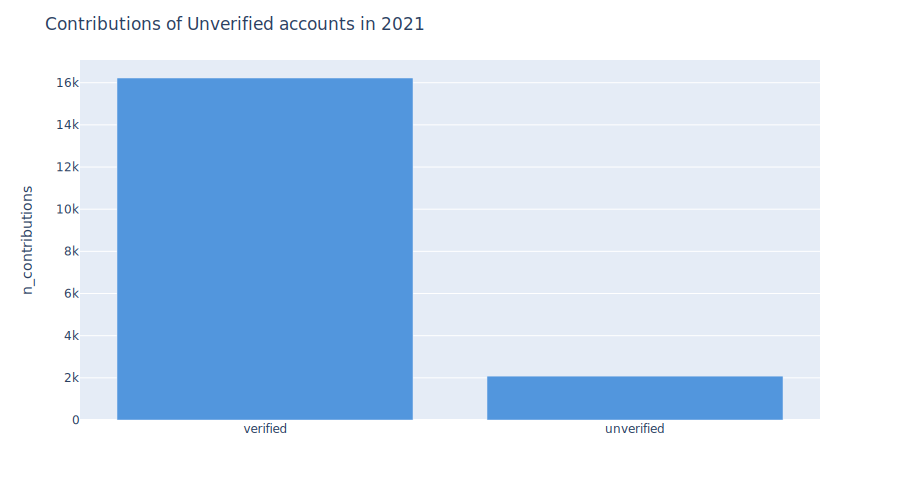

In [74]:
px.bar(data_frame=df_merged['has_verified_email'].value_counts().to_frame().reset_index(),
       x=['verified', 'unverified'], y="has_verified_email").update_layout(title='Contributions of Unverified accounts in 2021',
                   xaxis_title='',
                   yaxis_title='n_contributions').update_traces(marker_color='#5296dd')


In [75]:
print('Total unverified accounts contributions in 2021:')
df_unverified.shape[0]

Total unverified accounts contributions in 2021:


2082

### Peak day contributions 17/04/2021

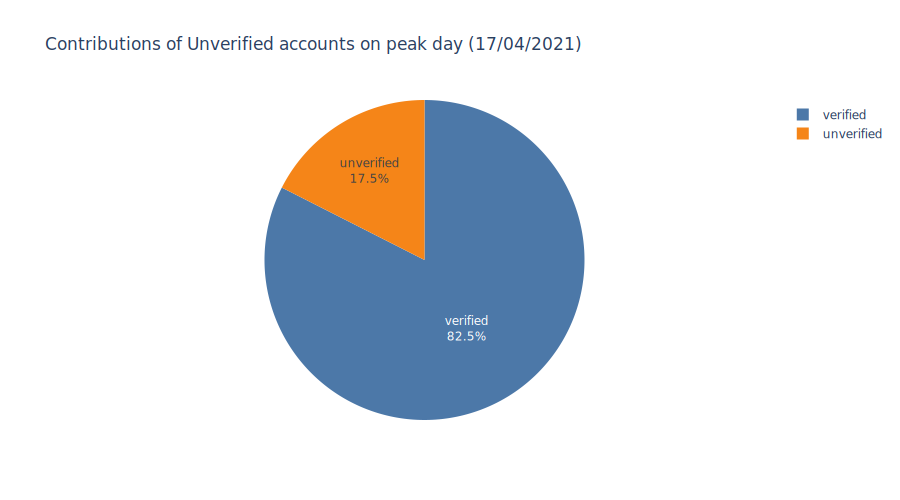

In [76]:
fig = px.pie(df_peak.has_verified_email.value_counts(),
             values='has_verified_email', names=['verified', 'unverified'], color_discrete_sequence = colors,
             title = 'Contributions of Unverified accounts on peak day (17/04/2021)')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

### Comments

In [77]:
print('Total banned accounts comments in 2021:')
df_unverified.query(" submission_comment == 'comment' ").shape[0]

Total banned accounts comments in 2021:


1939

In [78]:
df_unverified.query(" submission_comment == 'comment' ").text.value_counts().head(5)

Amber                 5
Same                  5
Lol                   5
Amber Heard           3
Justice for Johnny    2
Name: text, dtype: int64

### Submissions

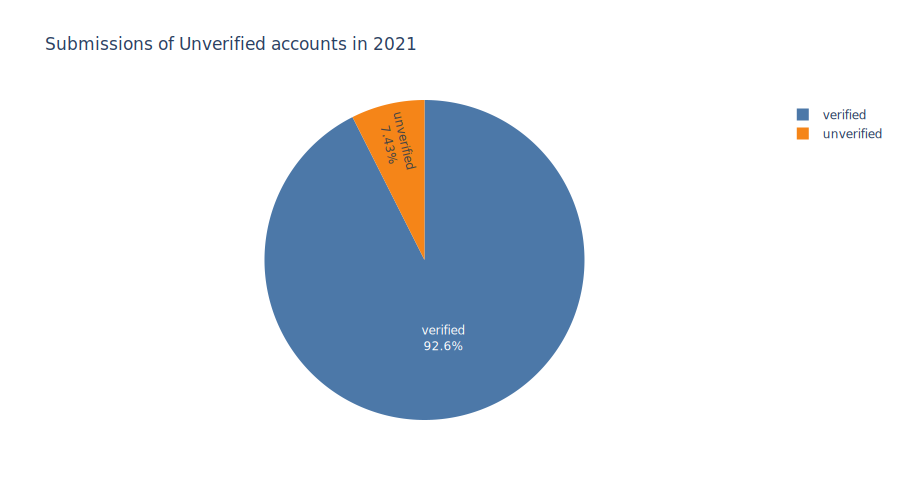

In [79]:
fig = px.pie(df_submissions.has_verified_email.value_counts(),
             values='has_verified_email', names=['verified', 'unverified'], color_discrete_sequence = colors,
             title = 'Submissions of Unverified accounts in 2021')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [80]:
print('The percentage % of 2021 submissions made by Unverified accounts:')
unverified_sub_prop = df_unverified.query(" submission_comment == 'submission' ").shape[0] * 100\
/df_merged.query(" submission_comment == 'submission' ").shape[0]

unverified_sub_prop

The percentage % of 2021 submissions made by Unverified accounts:


7.428571428571429

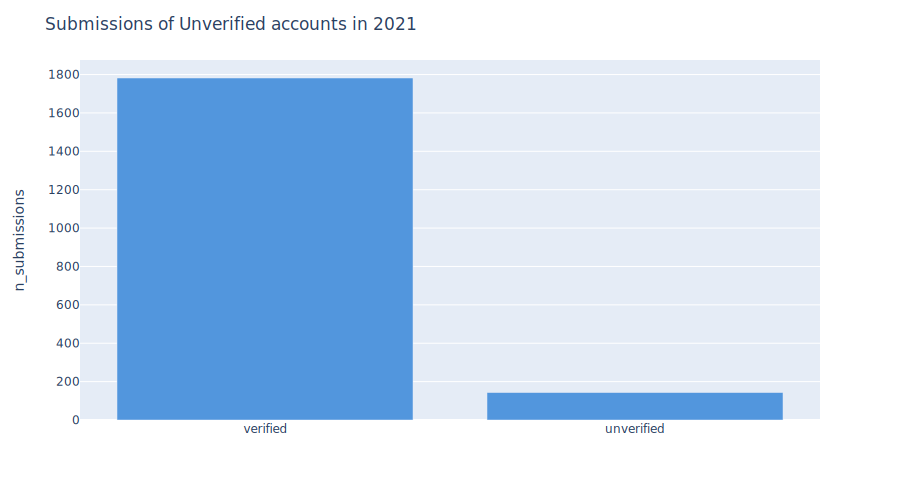

In [81]:
px.bar(data_frame=df_submissions['has_verified_email'].value_counts(),
       x=['verified', 'unverified'], y="has_verified_email")\
       .update_layout(title='Submissions of Unverified accounts in 2021',
                      xaxis_title='',
                      yaxis_title='n_submissions').update_traces(marker_color='#5296dd')

In [82]:
print('Total unverified accounts submissions in 2021:')
df_unverified.query(" submission_comment == 'submission' ").shape[0]

Total unverified accounts submissions in 2021:


143

In [83]:
df_unverified.query(" submission_comment == 'submission' ").text.value_counts().head(5)

Amber Heard Touching Herself                                                                                                                                                                                                                                                 22
Can Somebody RP as Amber Heard for me longterm?                                                                                                                                                                                                                               6
Amber Heard                                                                                                                                                                                                                                                                   6
It's official AMBER HEARD lied!: did not Donate 7 million divorce settlement which she PROMISED and stated to have donated in court under oath. 3,5 million are unaccounted, her legal t

In [84]:
txt = 'Amber Heard Touching Herself'
df_unverified[df_unverified['text'] == txt][['user_name', 'user_created_at', 'submission_comment', 'created_at']]

# Note that we don't have data on banned users except for their names.

,user_name,user_created_at,submission_comment,created_at
13808,owenlinx,2019-01-01 09:15:33,submission,2021-04-14 12:17:01
13809,owenlinx,2019-01-01 09:15:33,submission,2021-04-14 12:17:03
13810,owenlinx,2019-01-01 09:15:33,submission,2021-04-14 12:17:06
13811,owenlinx,2019-01-01 09:15:33,submission,2021-04-14 12:17:06
13812,owenlinx,2019-01-01 09:15:33,submission,2021-04-14 12:17:09
13813,owenlinx,2019-01-01 09:15:33,submission,2021-04-14 12:17:09
13814,owenlinx,2019-01-01 09:15:33,submission,2021-04-14 12:17:12
13815,owenlinx,2019-01-01 09:15:33,submission,2021-04-14 12:17:12
13816,owenlinx,2019-01-01 09:15:33,submission,2021-04-14 12:17:19
13817,owenlinx,2019-01-01 09:15:33,submission,2021-04-14 12:21:45


**"owenlinx" , "garretdanielkelly"** Both users are bots since, they posted more than one different submission with the same submission text <br> "Amber Heard Touching Herself" in exactly the same second!! <br>
(sexual content)

In [85]:
txt = 'Can Somebody RP as Amber Heard for me longterm?'
df_unverified[df_unverified['text'] == txt][['user_name', 'user_created_at', 'submission_comment', 'created_at']]

,user_name,user_created_at,submission_comment,created_at
2923,RoleplayGuy21,2020-11-06 18:10:49,submission,2021-02-25 01:11:34
2924,RoleplayGuy21,2020-11-06 18:10:49,submission,2021-02-25 19:57:10
2925,RoleplayGuy21,2020-11-06 18:10:49,submission,2021-02-25 21:07:11
18054,RoleplayTime21,2021-04-14 11:10:20,submission,2021-05-21 18:08:45
18055,RoleplayTime21,2021-04-14 11:10:20,submission,2021-05-21 18:42:25
18056,RoleplayTime21,2021-04-14 11:10:20,submission,2021-05-21 20:34:18


**"RoleplayGuy21" , "RoleplayTime21"** Two different accounts posting submissions with the same submission text <br>"Can Somebody RP as Amber Heard for me longterm?". <br>
(sexual content)

<a id='unverified_creations'></a>
>>### The account creation year of the unverified accounts contributed in 2021

<ul>
<li><a href="#largest_link_karma">Unverified Accounts With The Largest Link Karma</a></li>   
<li><a href="#largest_comment_karma">Unverified Accounts With The Largest Comment Karma</a></li>
    <br>
<li><a href="#minimum_link_karma">Unverified Accounts With The Minimum Link Karma</a></li>
<li><a href="#minimum_comment_karma">Unverified Accounts With The Minimum Comment Karma</a></li>
    <br>
<li><a href="#largest_scores">Explore the largest scores</a></li>
<li><a href="#minimum_scores">Explore the minimum scores</a></li>
    <br>
<li><a href="#unverified_contributions">Contributions of Unverified accounts in 2021</a></li>
<li><a href="#unverified_creations"><b><mark>Creation years of the unverified accounts contributed in 2021</mark></b></a></li>
<li><a href="#unverified_peak">Unverified Contributions Peaks</a></li>
</ul>

### Contributions

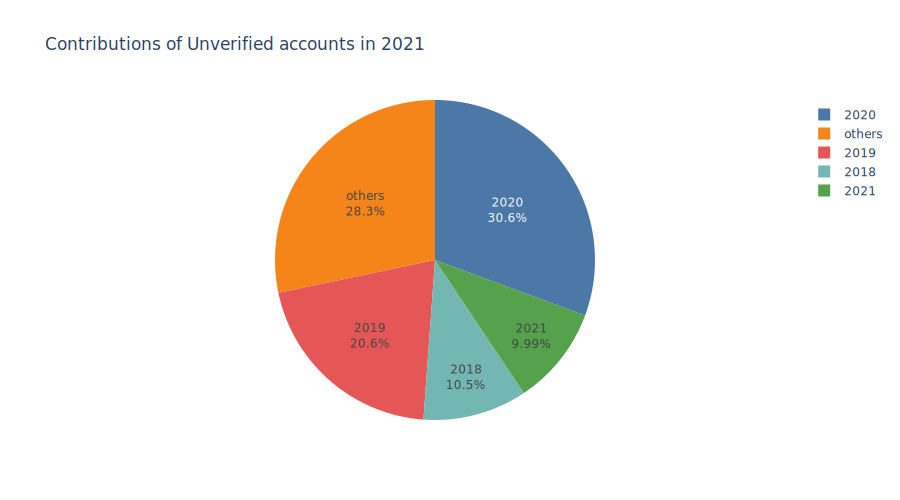

In [86]:
fig = px.pie(df_unverified.creation_year.value_counts().to_frame().reset_index(),
             values='creation_year', names='index', color_discrete_sequence = colors,
             title = 'Contributions of Unverified accounts in 2021')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

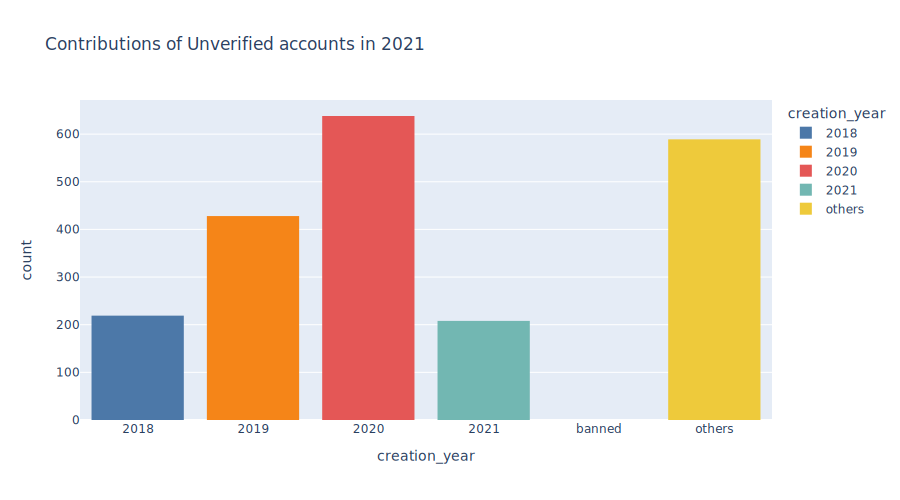

In [87]:
fig = px.histogram(df_unverified, x='creation_year', color="creation_year", 
                    color_discrete_sequence = colors,
                   category_orders = dict(creation_year=['2018', '2019', '2020', '2021', 'banned', 'others']),
                   title = 'Contributions of Unverified accounts in 2021')
fig.show()

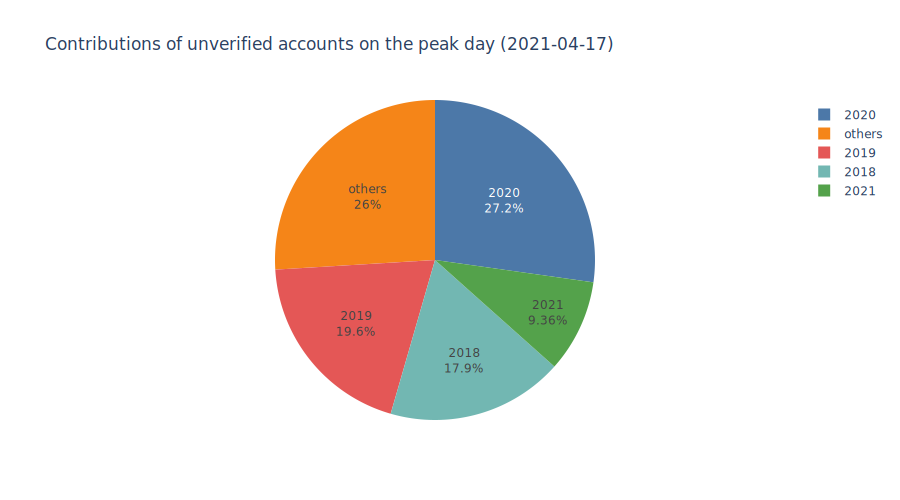

In [88]:
fig = px.pie(df_unverified_peak.creation_year.value_counts().to_frame().reset_index(),
             values='creation_year', names='index', color_discrete_sequence = colors,
             title = 'Contributions of unverified accounts on the peak day (2021-04-17)')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

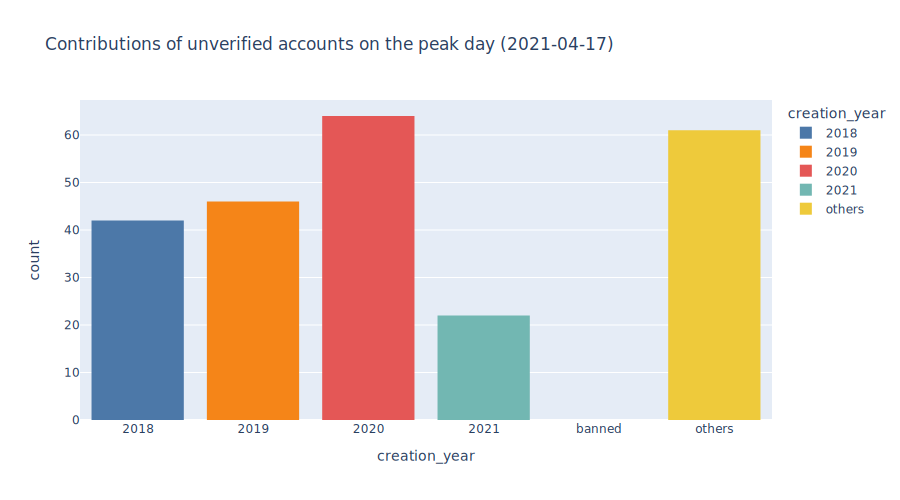

In [89]:
fig = px.histogram(df_unverified_peak, x='creation_year', color="creation_year", 
                    color_discrete_sequence = colors,
                   category_orders = dict(creation_year=['2018', '2019', '2020', '2021', 'banned', 'others']),
                   title = 'Contributions of unverified accounts on the peak day (2021-04-17)')
fig.show()

### Submissions

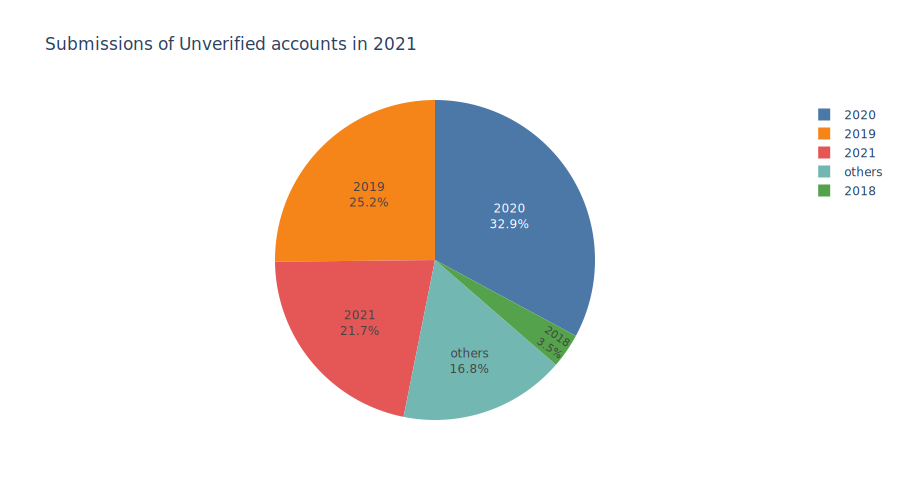

In [90]:
fig = px.pie(df_unverified_submissions.creation_year.value_counts().to_frame().reset_index(),
             values='creation_year', names='index', color_discrete_sequence = colors,
             title = 'Submissions of Unverified accounts in 2021')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

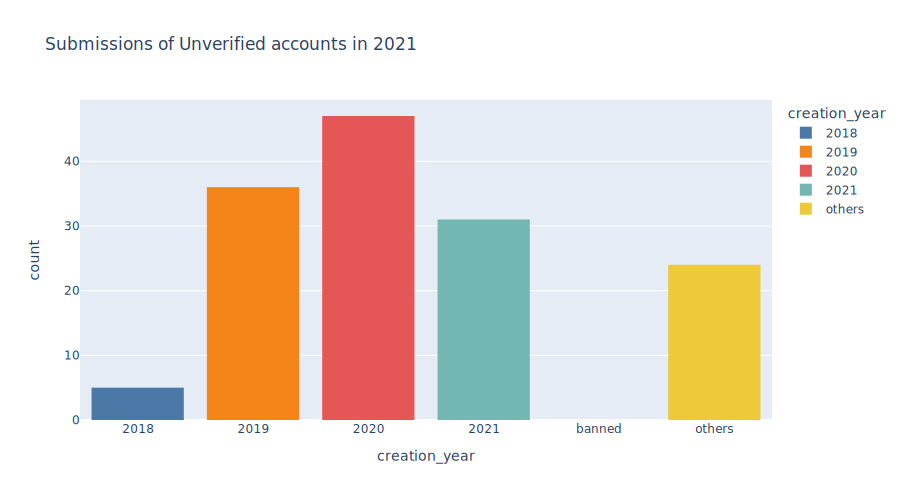

In [91]:
fig = px.histogram(df_unverified_submissions, x='creation_year', color="creation_year", 
                   color_discrete_sequence = colors,
                   category_orders = dict(creation_year=['2018', '2019', '2020', '2021', 'banned', 'others']),
                   title = 'Submissions of Unverified accounts in 2021')
fig.show()

In [92]:
df_unverified_peak_submissions

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,...,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation


Unverified Accounts made no submissions on the beak day 17/04/2021

<a id='unverified_peak'></a>
>>### Which dates had the highest contrbitions of unverified accounts?

<ul>
<li><a href="#largest_link_karma">Unverified Accounts With The Largest Link Karma</a></li>   
<li><a href="#largest_comment_karma">Unverified Accounts With The Largest Comment Karma</a></li>
    <br>
<li><a href="#minimum_link_karma">Unverified Accounts With The Minimum Link Karma</a></li>
<li><a href="#minimum_comment_karma">Unverified Accounts With The Minimum Comment Karma</a></li>
    <br>
<li><a href="#largest_scores">Explore the largest scores</a></li>
<li><a href="#minimum_scores">Explore the minimum scores</a></li>
    <br>
<li><a href="#unverified_contributions">Contributions of Unverified accounts in 2021</a></li>
<li><a href="#unverified_creations">Creation years of the unverified accounts contributed in 2021</a></li>
<li><a href="#unverified_peak"><b><mark>Unverified Contributions Peaks</mark></b></a></li>
</ul>

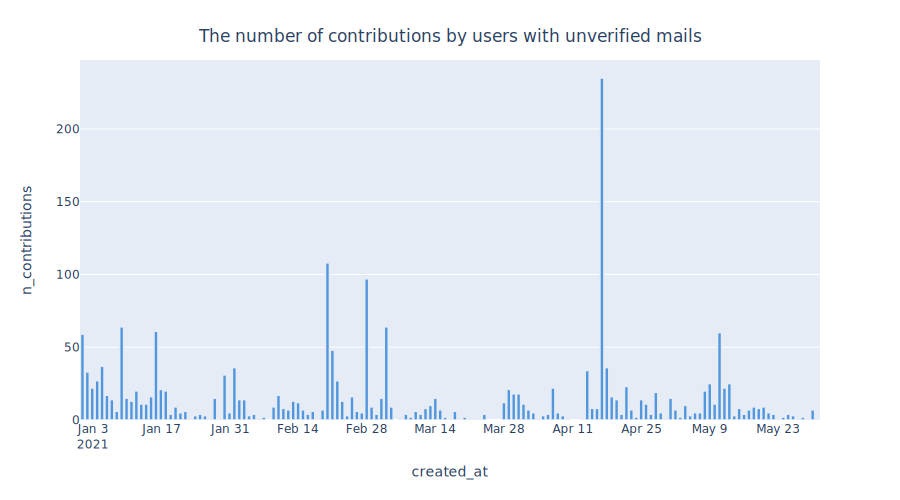

In [93]:
# group by date an count
unverified_contributions = df_unverified.groupby(df_unverified.created_at.dt.date).size().reset_index(name='n_contributions')

fig = px.bar(unverified_contributions,
             x='created_at', y='n_contributions')

fig.update_layout(
            title={
        'text': "The number of contributions by users with unverified mails",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        })

fig.update_traces(marker_color='#5296dd',
                  marker_line_width=1.5, opacity=1, textposition='auto').update_layout()
fig.show()

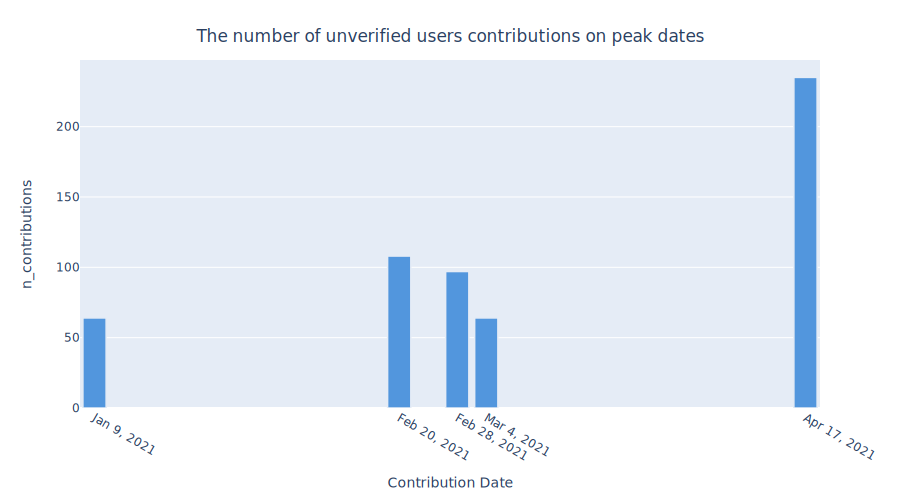

In [94]:
# sort by n_contributions, take the top 3, then sort them by date 
unverified_contributions.sort_values('n_contributions', ascending=False, inplace=True)
unverified_trendy = unverified_contributions.head(5)
unverified_trendy.sort_values('created_at', inplace=True)

fig = px.bar(unverified_trendy,
             x='created_at', y='n_contributions')

fig.update_layout(
            title={
        'text': "The number of unverified users contributions on peak dates",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        })

fig.update_layout(
    xaxis = dict(
        title='Contribution Date',
        tickmode = 'array',
        tickvals = unverified_trendy.created_at,
    )
)

fig.update_traces(marker_color='#5296dd',
                  marker_line_width=1.5, opacity=1, textposition='auto').update_layout()
fig.show()

<a id='new_others'></a>
># New Vs Others

<ul>
<li><a href="#banned_unverified">Banned / Unverified</a></li>    
<li><a href="#explore_banned">Banned Accounts</a></li>
    <br>
<li><a href="#explore_unverified">Unverified Accounts</a></li>
    <br>
<li><a href="#new_others"><b><mark>New Vs Others</mark></b></a></li>
<li><a href="#explore_new">New Accounts</a></li>
    <br>
<li><a href="#contributions_scores">2021 Contributions Scores</a></li>
</ul>

### Contributions

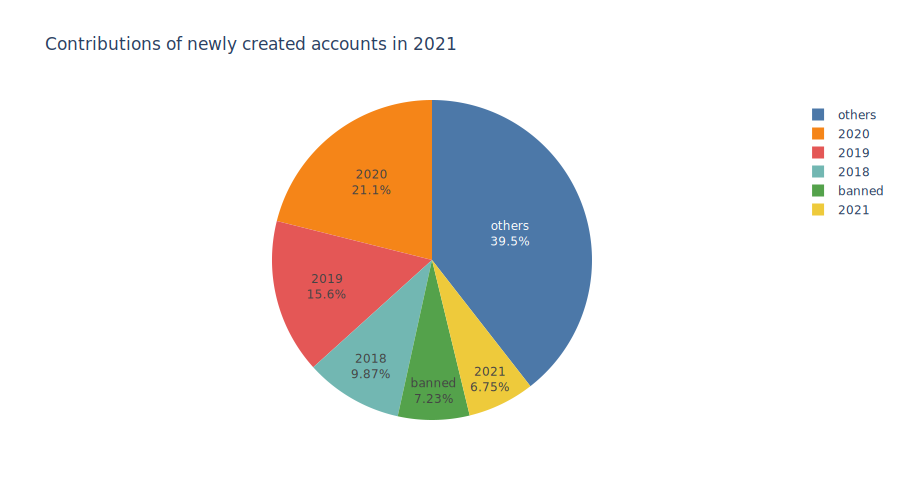

In [95]:
fig = px.pie(df_merged.creation_year.value_counts().to_frame().reset_index(),
             values='creation_year', names='index', color_discrete_sequence = colors,
             title = 'Contributions of newly created accounts in 2021')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

**NOTE:** More than 60% of 2021 Contributions were made by newly created accounts (last 4 years)

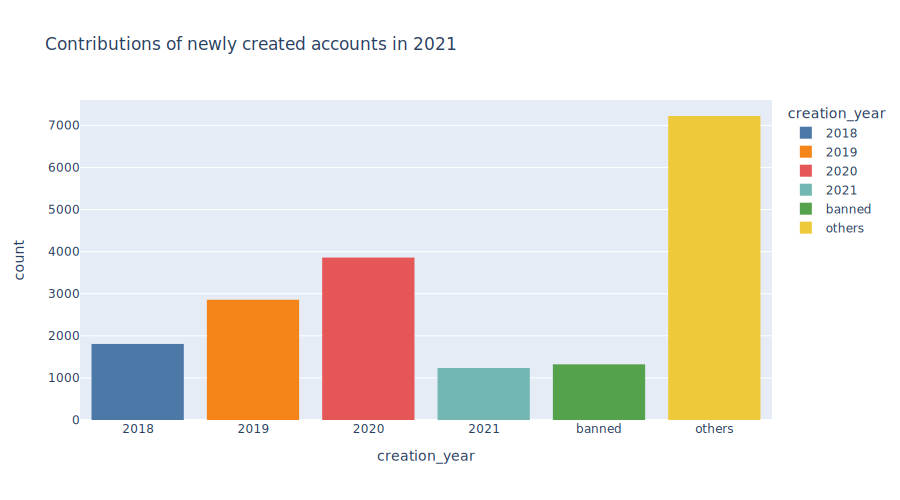

In [96]:
fig = px.histogram(df_merged, x='creation_year', color="creation_year", 
                    color_discrete_sequence = colors,
                   category_orders = dict(creation_year=['2018', '2019', '2020', '2021', 'banned', 'others']),
                   title = 'Contributions of newly created accounts in 2021')
fig.show()

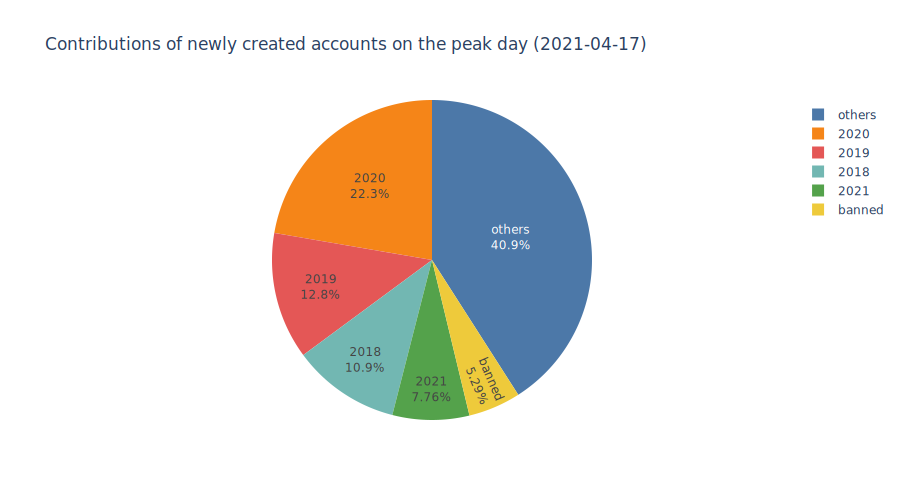

In [97]:
fig = px.pie(df_peak.creation_year.value_counts().to_frame().reset_index(),
             values='creation_year', names='index', color_discrete_sequence = colors,
             title = 'Contributions of newly created accounts on the peak day (2021-04-17)')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

**NOTE:** About 60% of 2021 Contributions were made by newly created accounts (last 4 years)

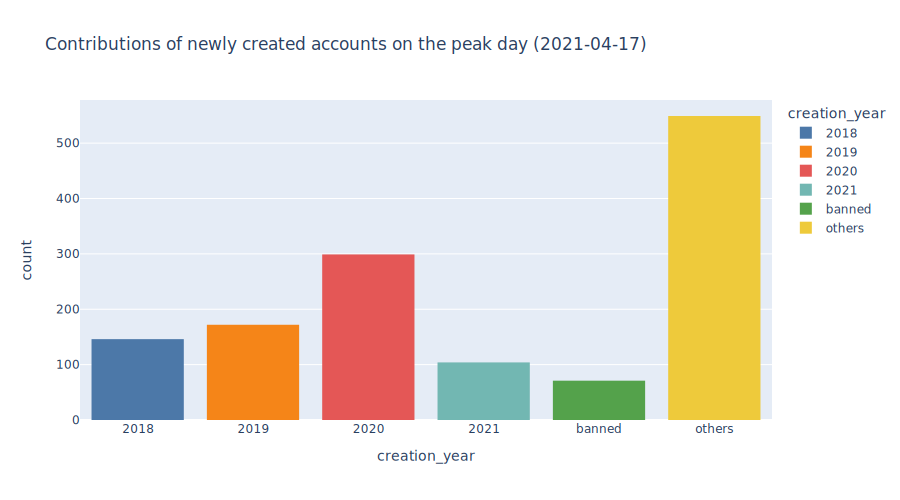

In [98]:
fig = px.histogram(df_peak, 
                   x='creation_year', color="creation_year", 
                   color_discrete_sequence = colors,
                   category_orders = dict(creation_year=['2018', '2019', '2020', '2021', 'banned', 'others']),
                   title = 'Contributions of newly created accounts on the peak day (2021-04-17)')
fig.show()

### Submissions

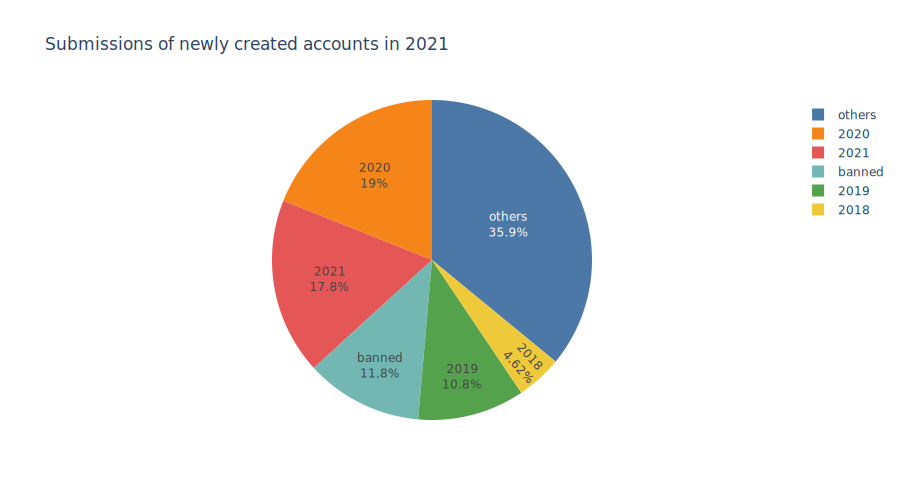

In [99]:
fig = px.pie(df_submissions.creation_year.value_counts().to_frame().reset_index(),
             values='creation_year', names='index', color_discrete_sequence = colors,
             title = 'Submissions of newly created accounts in 2021')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

**NOTE:** About 65% of 2021 Submissions were made by newly created accounts (last 4 years)

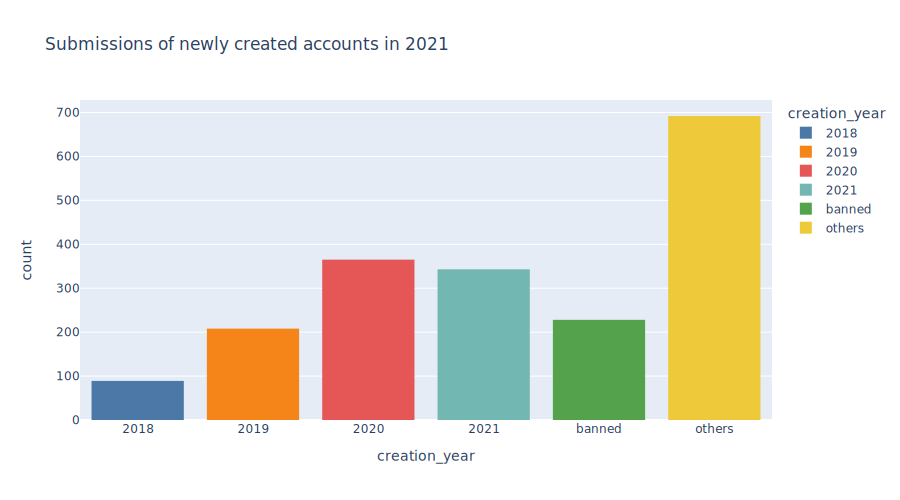

In [100]:
fig = px.histogram(df_submissions, x='creation_year', color="creation_year", 
                  color_discrete_sequence = colors,
                   category_orders = dict(creation_year=['2018', '2019', '2020', '2021', 'banned', 'others']),
                   title = 'Submissions of newly created accounts in 2021')
fig.show()

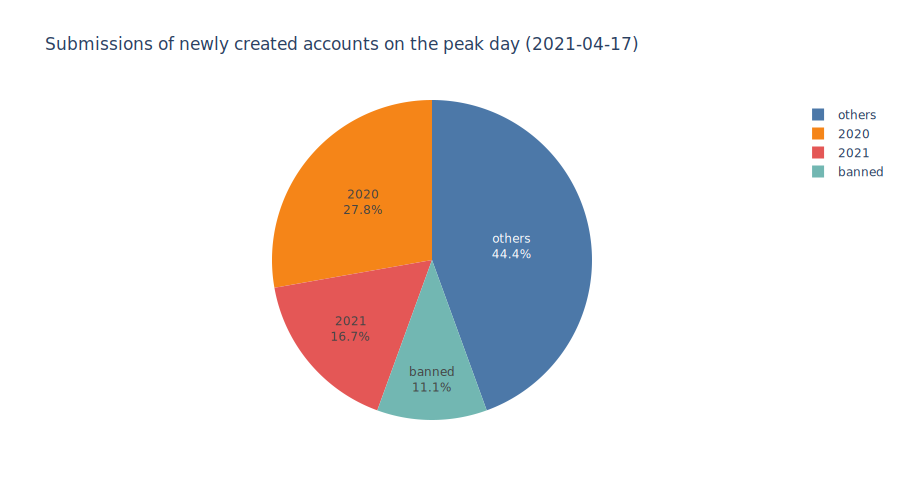

In [101]:
fig = px.pie(df_peak.query("submission_comment == 'submission'").creation_year.value_counts().to_frame().reset_index(),
             values='creation_year', names='index', color_discrete_sequence = colors,
             title = 'Submissions of newly created accounts on the peak day (2021-04-17)')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

**NOTE:** There is no submissions made (in the peak day of 2021) from 2018, 2019 accounts on that day. <br>
Submissions are only made by accounts created in 2020 & 2021

In [102]:
df_peak.shape[0]

1341

In [103]:
df_peak.query("submission_comment == 'submission'").shape[0]

18

**NOTE:** We only have 18 submissions on peak day with about 1300 comments and replies

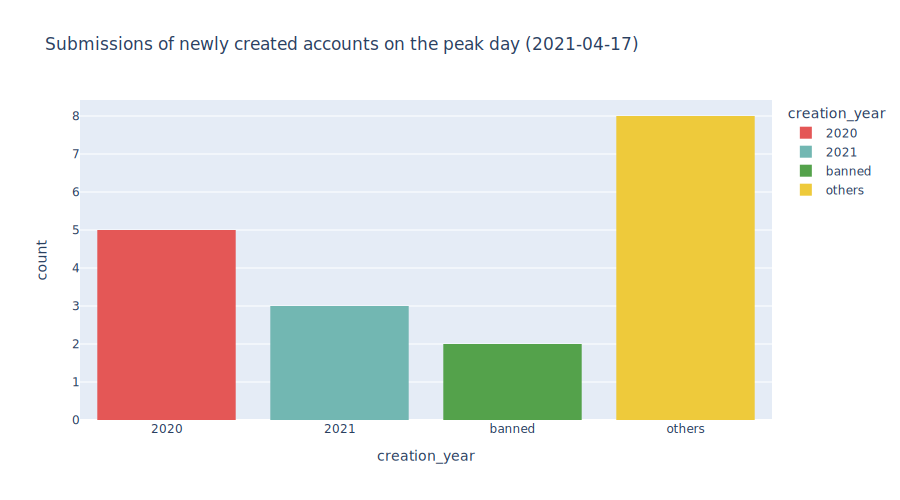

In [104]:
fig = px.histogram(df_merged[(df_merged['created_at'].dt.date.astype('str') == '2021-04-17') &\
                            (df_merged['submission_comment'] == 'submission')], 
                   x='creation_year', color="creation_year", 
                  color_discrete_sequence = colors,
                   category_orders = dict(creation_year=['2018', '2019', '2020', '2021', 'banned', 'others']),
                   title = 'Submissions of newly created accounts on the peak day (2021-04-17)')
fig.show()

<a id='explore_new'></a>
># New Accounts

<ul>
<li><a href="#banned_unverified">Banned / Unverified</a></li>    
<li><a href="#explore_banned">Banned Accounts</a></li>
    <br>
<li><a href="#explore_unverified">Unverified Accounts</a></li>
    <br>
<li><a href="#new_others">New Vs Others</a></li>
<li><a href="#explore_new"><b><mark>New Accounts</mark></b></a></li>
    <br>
<li><a href="#contributions_scores">2021 Contributions Scores</a></li>
</ul>

<a id='explore_4'></a>
>># Last 4 Years

<ul>
<li><a href="#explore_4"><b><mark>Last 4 Years</mark></b></a></li>
<li><a href="#explore_2018">Accounts created in 2018</a></li>
<li><a href="#explore_2019">Accounts created in 2019</a></li>
<li><a href="#explore_2020">Accounts created in 2020</a></li>
<li><a href="#explore_2021">Accounts created in 2021</a></li>
</ul>

### Contributions

In [105]:
print('Total contributions in 2021 made by newly created accounts(last 4 years):')
df_4.shape[0]

Total contributions in 2021 made by newly created accounts(last 4 years):


9759

In [106]:
print('The percentage % of 2021 contributions made by newly created accounts(last 4 years):')
contr_prop_4 = df_4.shape[0] * 100 /df_merged.shape[0]
contr_prop_4

The percentage % of 2021 contributions made by newly created accounts(last 4 years):


53.31330237639989

### Comments

In [107]:
print('Total comments in 2021 made by newly created accounts(last 4 years):')
df_4.query(" submission_comment == 'comment' ").shape[0]

Total comments in 2021 made by newly created accounts(last 4 years):


8754

In [108]:
# df_4.query(" submission_comment == 'comment' ").text.value_counts().head(5)

### Submissions

In [109]:
print('Total submissions in 2021 made by newly created accounts(last 4 years):')
df_4.query(" submission_comment == 'submission' ").shape[0]

Total submissions in 2021 made by newly created accounts(last 4 years):


1005

In [110]:
print('The percentage % of 2021 submissions made by newly created accounts(last 4 years):')
sub_prop_4 = df_4.query(" submission_comment == 'submission' ").shape[0] * 100\
/df_merged.query(" submission_comment == 'submission' ").shape[0]

sub_prop_4

The percentage % of 2021 submissions made by newly created accounts(last 4 years):


52.20779220779221

In [111]:
# df_4.query(" submission_comment == 'submission' ").text.value_counts().head(5)

<a id='explore_2018'></a>
>># Accounts created in 2018

<ul>
<li><a href="#explore_4">Last 4 Years</a></li>
<li><a href="#explore_2018"><b><mark>Accounts created in 2018</mark></b></a></li>
<li><a href="#explore_2019">Accounts created in 2019</a></li>
<li><a href="#explore_2020">Accounts created in 2020</a></li>
<li><a href="#explore_2021">Accounts created in 2021</a></li>
</ul>

### Contributions

In [112]:
print('Total contributions in 2021 made by newly created accounts(2018):')
df_18.shape[0]

Total contributions in 2021 made by newly created accounts(2018):


1807

In [113]:
print('The percentage % of 2021 contributions made by newly created accounts(2018):')
contr_prop_18 = df_18.shape[0] * 100 /df_merged.shape[0]
contr_prop_18

The percentage % of 2021 contributions made by newly created accounts(2018):


9.871619776017482

### Comments

In [114]:
print('Total comments in 2021 made by newly created accounts(2018):')
df_18.query(" submission_comment == 'comment' ").shape[0]

Total comments in 2021 made by newly created accounts(2018):


1718

In [115]:
# df_18.query(" submission_comment == 'comment' ").text.value_counts().head(5)

### Submissions

In [116]:
print('Total submissions in 2021 made by newly created accounts(2018):')
df_18.query(" submission_comment == 'submission' ").shape[0]

Total submissions in 2021 made by newly created accounts(2018):


89

In [117]:
print('The percentage % of 2021 submissions made by newly created accounts(2018):')
sub_prop_18 = df_18.query(" submission_comment == 'submission' ").shape[0] * 100\
/df_merged.query(" submission_comment == 'submission' ").shape[0]

sub_prop_18

The percentage % of 2021 submissions made by newly created accounts(2018):


4.623376623376624

In [118]:
# df_18.query(" submission_comment == 'submission' ").text.value_counts().head(5)

<a id='explore_2019'></a>
>># Accounts created in 2019

<ul>
<li><a href="#explore_4">Last 4 Years</a></li>
<li><a href="#explore_2018">Accounts created in 2018</a></li>
<li><a href="#explore_2019"><b><mark>Accounts created in 2019</mark></b></a></li>
<li><a href="#explore_2020">Accounts created in 2020</a></li>
<li><a href="#explore_2021">Accounts created in 2021</a></li>
</ul>

### Contributions

In [119]:
print('Total contributions in 2021 made by newly created accounts(2019):')
df_19.shape[0]

Total contributions in 2021 made by newly created accounts(2019):


2857

In [120]:
print('The percentage % of 2021 contributions made by newly created accounts(2019):')
contr_prop_19 = df_19.shape[0] * 100 /df_merged.shape[0]
contr_prop_19

The percentage % of 2021 contributions made by newly created accounts(2019):


15.607757443321496

### Comments

In [121]:
print('Total comments in 2021 made by newly created accounts(2019):')
df_19.query(" submission_comment == 'comment' ").shape[0]

Total comments in 2021 made by newly created accounts(2019):


2649

In [122]:
# df_19.query(" submission_comment == 'comment' ").text.value_counts().head(5)

### Submissions

In [123]:
print('Total submissions in 2021 made by newly created accounts(2019):')
df_19.query(" submission_comment == 'submission' ").shape[0]

Total submissions in 2021 made by newly created accounts(2019):


208

In [124]:
print('The percentage % of 2021 submissions made by newly created accounts(2019):')
sub_prop_19 = df_19.query(" submission_comment == 'submission' ").shape[0] * 100\
/df_merged.query(" submission_comment == 'submission' ").shape[0]

sub_prop_19

The percentage % of 2021 submissions made by newly created accounts(2019):


10.805194805194805

In [125]:
# df_19.query(" submission_comment == 'submission' ").text.value_counts().head(5)

<a id='explore_2020'></a>
>># Accounts created in 2020

<ul>
<li><a href="#explore_4">Last 4 Years</a></li>
<li><a href="#explore_2018">Accounts created in 2018</a></li>
<li><a href="#explore_2019">Accounts created in 2019</a></li>
<li><a href="#explore_2020"><b><mark>Accounts created in 2020</mark></b></a></li>
<li><a href="#explore_2021">Accounts created in 2021</a></li>
</ul>

### Contributions

In [126]:
print('Total contributions in 2021 made by newly created accounts(2020):')
df_20.shape[0]

Total contributions in 2021 made by newly created accounts(2020):


3859

In [127]:
print('The percentage % of 2021 contributions made by newly created accounts(2020):')
contr_prop_20 = df_20.shape[0] * 100 /df_merged.shape[0]
contr_prop_20

The percentage % of 2021 contributions made by newly created accounts(2020):


21.0816716744059

### Comments

In [128]:
print('Total comments in 2021 made by newly created accounts(2020):')
df_20.query(" submission_comment == 'comment' ").shape[0]

Total comments in 2021 made by newly created accounts(2020):


3494

In [129]:
# df_20.query(" submission_comment == 'comment' ").text.value_counts().head(5)

### Submissions

In [130]:
print('Total submissions in 2021 made by newly created accounts(2020):')
df_20.query(" submission_comment == 'submission' ").shape[0]

Total submissions in 2021 made by newly created accounts(2020):


365

In [131]:
print('The percentage % of 2021 submissions made by newly created accounts(2020):')
sub_prop_20 = df_20.query(" submission_comment == 'submission' ").shape[0] * 100\
/df_merged.query(" submission_comment == 'submission' ").shape[0]

sub_prop_20

The percentage % of 2021 submissions made by newly created accounts(2020):


18.961038961038962

In [132]:
# df_20.query(" submission_comment == 'submission' ").text.value_counts().head(5)

<a id='explore_2021'></a>
>># Accounts created in 2021

<ul>
<li><a href="#explore_4">Last 4 Years</a></li>
<li><a href="#explore_2018">Accounts created in 2018</a></li>
<li><a href="#explore_2019">Accounts created in 2019</a></li>
<li><a href="#explore_2020">Accounts created in 2020</a></li>
<li><a href="#explore_2021"><b><mark>Accounts created in 2021</mark></b></a></li>
</ul>

### Contributions

In [133]:
print('Total contributions in 2021 made by newly created accounts(2021):')
df_21.shape[0]

Total contributions in 2021 made by newly created accounts(2021):


1236

In [134]:
print('The percentage % of 2021 contributions made by newly created accounts(2021):')
contr_prop_21 = df_21.shape[0] * 100 /df_merged.shape[0]
contr_prop_21

The percentage % of 2021 contributions made by newly created accounts(2021):


6.7522534826550125

### Comments

In [135]:
print('Total comments in 2021 made by newly created accounts(2021):')
df_21.query(" submission_comment == 'comment' ").shape[0]

Total comments in 2021 made by newly created accounts(2021):


893

In [136]:
# df_21.query(" submission_comment == 'comment' ").text.value_counts().head(5)

### Submissions

In [137]:
print('Total submissions in 2021 made by newly created accounts(2021):')
df_21.query(" submission_comment == 'submission' ").shape[0]

Total submissions in 2021 made by newly created accounts(2021):


343

In [138]:
print('The percentage % of 2021 submissions made by newly created accounts(2021):')
sub_prop_21 = df_21.query(" submission_comment == 'submission' ").shape[0] * 100\
/df_merged.query(" submission_comment == 'submission' ").shape[0]

sub_prop_21

The percentage % of 2021 submissions made by newly created accounts(2021):


17.818181818181817

In [139]:
# df_21.query(" submission_comment == 'submission' ").text.value_counts().head(5)

<a id='contributions_scores'></a>
># 2021 Contributions Scores

<ul>
<li><a href="#banned_unverified">Banned / Unverified</a></li>    
<li><a href="#explore_banned">Banned Accounts</a></li>
    <br>
<li><a href="#explore_unverified">Unverified Accounts</a></li>
    <br>
<li><a href="#new_others">New Vs Others</a></li>
<li><a href="#explore_new">New Accounts</a></li>
    <br>
<li><a href="#contributions_scores"><b><mark>2021 Contributions Scores</mark></b></a></li>
</ul>

>>### Explore the largest scores

In [140]:
df_merged.score.describe()

count    18278.000000
mean        23.909892
std        374.406745
min       -517.000000
25%          1.000000
50%          2.000000
75%          6.000000
max      29511.000000
Name: score, dtype: float64

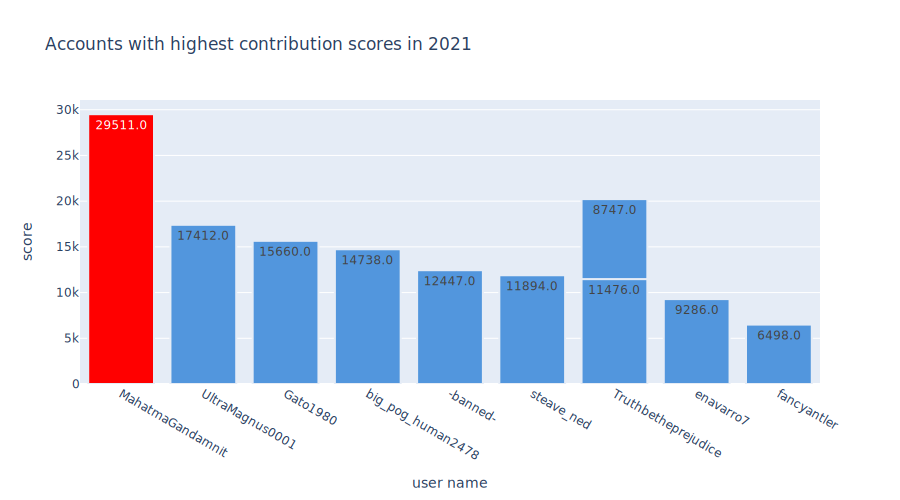

In [141]:
# Filter on largest scores

df_scores_high = df_merged.sort_values('score', ascending=False).head(10)

fig = px.bar(df_scores_high,
             x='user_name', 
             y=df_scores_high.score, text = df_scores_high.score, title='Accounts with highest contribution scores in 2021')

fig.update_layout(
    xaxis = dict(
        title='user name',
        tickmode = 'array',
        tickvals = df_scores_high.user_name,
    )
)

clrs = ['red' if (y > 18000) else '#5296dd' for y in df_scores_high.score]

fig.update_traces(marker_color=clrs,
                  marker_line_width=2, opacity=1, textposition='auto')


fig.show()

**MahatmaGandamnit** <br>
- Created on 2016-10-10 
- Has only one negative submission in 2021 (28 Feb) and got the highest contribution scores (29.5K)
- reddit.com/r/pussypassdenied/comments/lu5055/amber_heard_has_been_fired_from_jason_momoas/

In [142]:
with pd.option_context('display.max_colwidth', None):
  display(df_merged[df_merged.user_name == 'MahatmaGandamnit'])

# Negative Submission

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,...,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
10577,t3_lu5055,/r/pussypassdenied/comments/lu5055/amber_heard_has_been_fired_from_jason_momoas/,"Amber Heard Has Been Fired From Jason Momoa's ""Aquaman 2""",NaN,r/pussypassdenied,2021-02-28 03:51:34,Neutral,Negative,29511.0,NaN,...,False,False,False,7219.0,10995.0,2016-10-10 00:01:25,others,others,1602 days 03:50:09,1602.0


>>### Explore the minimum scores

https://stackoverflow.com/questions/67590028/plotly-how-to-move-x-axis-to-top-and-y-axis-to-the-right

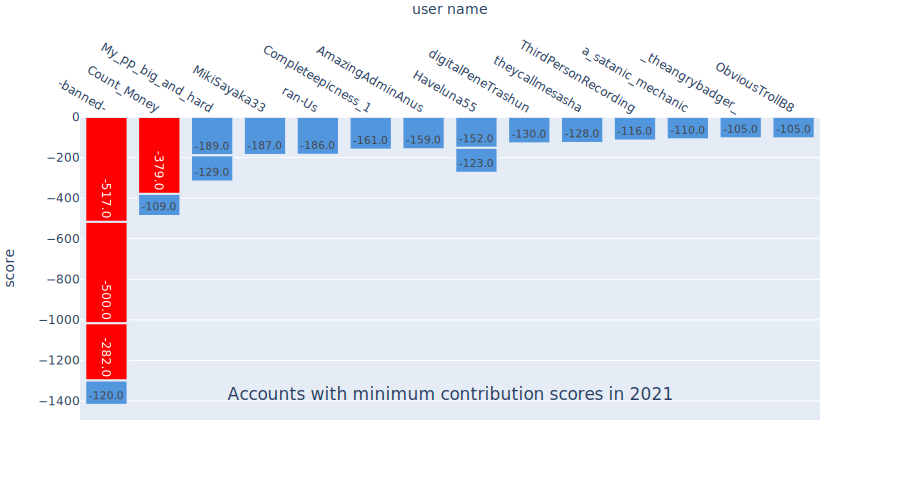

In [143]:
# Filter on minimum scores

df_scores_low = df_merged.sort_values('score').head(20)

fig = px.bar(df_scores_low,
             x='user_name', 
             y=df_scores_low.score, 
             text = df_scores_low.score)

fig.update_layout(title_text='Accounts with minimum contribution scores in 2021', title_x=0.5, title_y=0.2)

fig.update_layout(
    xaxis = dict(
        side='top',
        title='user name',
        tickmode = 'array',
        tickvals = df_scores_low.user_name,
    )
)

clrs = ['red' if (y < -200) else '#5296dd' for y in df_scores_low.score]

fig.update_traces(marker_color=clrs,
                  marker_line_width=2, opacity=1, textposition='auto')


fig.show()


**Count_Money** <br>
- Created on 2016-07-28 
- Has the minimum contribution scores in 2021
- Posting sexual comments

In [144]:
df_count = df_merged[df_merged.user_name == 'Count_Money'].sort_values('created_at')
df_count

# Posting sexual comments

,child_id,permalink,text,parent_id,subreddit,created_at,sentiment_blob,sentiment_nltk,score,top_level,...,is_mod,is_gold,is_banned,comment_karma,link_karma,user_created_at,banned_unverified,creation_year,diff,days_after_creation
13134,t1_gsuiv6l,/r/iamatotalpieceofshit/comments/mgjuv3/amber_...,She is super hot though,t3_mgjuv3,r/iamatotalpieceofshit,2021-03-30 21:39:50,Positive,Positive,-26.0,submission,...,False,False,False,27855.0,52.0,2016-07-28 21:39:06,others,others,1706 days 00:00:44,1706.0
13135,t1_gsujy3d,/r/iamatotalpieceofshit/comments/mgjuv3/amber_...,Love is respect,t1_gsujuvn,r/iamatotalpieceofshit,2021-03-30 21:48:42,Positive,Positive,-379.0,comment,...,False,False,False,27855.0,52.0,2016-07-28 21:39:06,others,others,1706 days 00:09:36,1706.0
13136,t1_gsum27o,/r/iamatotalpieceofshit/comments/mgjuv3/amber_...,This is sad. I hope you find love one day.,t1_gsulr33,r/iamatotalpieceofshit,2021-03-30 22:06:13,Neutral,Neutral,-109.0,comment,...,False,False,False,27855.0,52.0,2016-07-28 21:39:06,others,others,1706 days 00:27:07,1706.0
13137,t1_gsumt4r,/r/iamatotalpieceofshit/comments/mgjuv3/amber_...,Well I do usually pay for everything when I go...,t1_gsumj0k,r/iamatotalpieceofshit,2021-03-30 22:12:25,Positive,Neutral,-40.0,comment,...,False,False,False,27855.0,52.0,2016-07-28 21:39:06,others,others,1706 days 00:33:19,1706.0
13138,t1_gsuui2x,/r/iamatotalpieceofshit/comments/mgjuv3/amber_...,It really is isn't it,t1_gsuu4m1,r/iamatotalpieceofshit,2021-03-30 23:19:00,Positive,Neutral,1.0,comment,...,False,False,False,27855.0,52.0,2016-07-28 21:39:06,others,others,1706 days 01:39:54,1706.0
13139,t1_gsuw8oc,/r/iamatotalpieceofshit/comments/mgjuv3/amber_...,Lol that's so cute. My wife is going to think ...,t1_gsuuq1b,r/iamatotalpieceofshit,2021-03-30 23:34:00,Positive,Positive,-1.0,comment,...,False,False,False,27855.0,52.0,2016-07-28 21:39:06,others,others,1706 days 01:54:54,1706.0


<a id='conclusions'></a>
## Conclusions

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b><mark>Conclusions</mark></b></a></li>
</ul>

>### Banned / Unverified Accounts 

- 20% of 2021 contributions were made by banned (7.23% --> 1323) and unverified (11.4% --> 2082) accounts.
- 20% of 2021 submissions were made by banned (11.8% --> 228) and unverified (7.43% --> 143) accounts.
-
- 25% of the peak day contributions (17/04/2021) were made by banned (5.29% --> 71) and unverified (17.5% --> 235) accounts.
- 11% (2 submissions) of the peak day submissions (17/04/2021) were made by banned accounts.

>### Banned

**Truthbetheprejudice:** <br>
(banned)
- This user contributions got the hieghest scores (more than 25K scores in 2021).
- Made 43 submissions in 2021, no comments at all.
- Posting the same submission in more than one subreddit within a few seconds/minutes.
- Most of the submissions were on May, 2021.
- made 4 submissions with the same text "Remove Amber Heard from Aquaman 2" within only 30 seconds!!


**the-speed-of-pain:** <br>
(banned)
- Made 2 submissions with the same text "Remove Amber Heard from Aquaman 2" within only 3 seconds!!

**90police:** <br>
(banned)
- Made 17 submissions in different subreddits within only 5 minutes!! --> (Sexual Content)

**My_pp_big_and_hard:** <br>
(banned)
- Has the minimum contributions scores (-400) --> (Sexual Comments)

>### Unverified

**"owenlinx" , "garretdanielkelly"** Both users are bots since, they posted more than one different submission with the same submission text <br> "Amber Heard Touching Herself" in exactly the same second!! <br>
(sexual content)

**"RoleplayGuy21" , "RoleplayTime21"** Two different accounts posting submissions with the same submission text <br>"Can Somebody RP as Amber Heard for me longterm?". <br>
(sexual content)

#### Unverified Accounts Contributions in 2021
| Accounts Creation Year | n_contributions |
| :--|:--|
|2021| 9.99% (208)|
|2020 | 30.6% (638)|
|2019 | 20.6% (428)|
|2018 | 10.5% (219)|
|others | 28.3% (589)|

#### Unverified Accounts Submissions in 2021
| Accounts Creation Year | n_submissions |
| :--|:--|
|2021| 21.7% (31)|
|2020 | 32.9% (47)|
|2019 | 25.2% (36)|
|2018 | 3.5% (5)|
|others | 16.8% (24)|


>### New Accounts 

- 60% of 2021 contributions were made by newly created accounts (last 4 years).
- 65% of 2021 submissions were made by newly created accounts (last 4 years).
-
- 60% of the peak day contributions (17/04/2021) were made by newly created accounts (last 4 years).
- 55% of the peak day submissions (17/04/2021) were made by newly created accounts (last 4 years).

#### New Accounts Contributions in 2021
| Accounts Creation Year | n_contributions |
| :--|:--|
|2021| 6.75% (1236)|
|2020 | 21.1% (3859)|
|2019 | 15.6% (2857)|
|2018 | 9.87% (1807)|
|banned | 7.23% (1323)|
|others | 39.5% (7223)|

#### New Accounts Submissions in 2021
| Accounts Creation Year | n_contributions |
| :--|:--|
|2021| 17.8% (343)|
|2020 | 19% (365)|
|2019 | 10.8% (208)|
|2018 | 4.62% (89)|
|banned | 11.8% (228)|
|others | 35.9% (692)|

**MahatmaGandamnit** <br>
- Created on 2016-10-10 
- Has only one negative submission in 2021 (28 Feb) and got the highest contribution scores (29.5K)
- reddit.com/r/pussypassdenied/comments/lu5055/amber_heard_has_been_fired_from_jason_momoas/

**Count_Money** <br>
- Created on 2016-07-28 
- Has the minimum contribution scores in 2021
- Posting sexual comments

In [145]:
# !jupyter nbconvert --to html new_banned_unverified_2021.ipynb 